# Group 25

## Name : Farbod Shishehbori 
## UN : 6669731
## Individual Experimentation
###  

# Consumer Finance Complaints Classification

This project is a multi-label classifier to classify the texts into eleven different labels. It shows the classification of consumer complaints text into 11 categories. This kind of classification would help financial institutions to classify the complaints they receive from their customers and to provide customized solutions. It is also possible to expand this model to a system which can recommend automatic solutions to complaints which they receive. Performing these kinds of tasks automatically will help the company to respond the complaints.

The text data will be analysied with plots and word cloud for each label and different text pre-processing such as removing digits, removing stopwords, lemmatization, removing punctuatuins and so forth will performed. 

Afterward, by using machine learning and deep learning methods such as Logistic Regression, Convolutional Neural Network (CNN), Bert and so forth, I am going to generate synthesized texts, similar to the input. 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Prevent showing the warnings in the outputs

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import the dataset as consumers and show the first 5 rows

import pandas as pd
consumers = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/consumer_complaints.csv')
consumers.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [4]:
consumers.describe(include='all')

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
count,555957,555957,397635,555957,212622,66806,85124,555957,551070,551452,77959,123458,555957,555957,555957,555957,555957,5.559570e+05
unique,1608,11,46,95,68,65646,10,3605,62,27052,3,4,6,1557,8,2,2,NaN
top,08/27/2015,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Account status,This company continues to report on my credit ...,Company chooses not to provide a public response,Bank of America,CA,300XX,Older American,Consent provided,Web,11/13/2015,Closed with explanation,Yes,No,NaN
freq,963,186475,74319,97191,26798,37,52478,55998,81700,1205,45257,66807,361338,1108,404293,541909,443823,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.600510e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.504296e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.863230e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.737830e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.441702e+06


In [5]:
# Show the number of null in each column

consumers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

In [6]:
# Calculate the percentage of null in each columns:

totalNull = consumers.isnull().sum()
total = consumers.shape[0]

(totalNull/total)*100

date_received                    0.000000
product                          0.000000
sub_product                     28.477382
issue                            0.000000
sub_issue                       61.755675
consumer_complaint_narrative    87.983603
company_public_response         84.688744
company                          0.000000
state                            0.879025
zipcode                          0.810314
tags                            85.977513
consumer_consent_provided       77.793606
submitted_via                    0.000000
date_sent_to_company             0.000000
company_response_to_consumer     0.000000
timely_response                  0.000000
consumer_disputed?               0.000000
complaint_id                     0.000000
dtype: float64

### "consumer complaints narrative" column

From the above it is clear that there are lots of null data in "consumers complaints cnarrative" column. Since this column is our entry text data, we are going to remove the null data from this column. 

Afterward, we are going to remove the columns which are not useful from our dataset.

In [7]:
# Removing the rows which are null in the consumer complaints narrative column:

consumers = consumers[pd.notnull(consumers['consumer_complaint_narrative'])]
consumers.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
190126,03/19/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,XXXX has claimed I owe them {$27.00} for XXXX ...,NaN,"Diversified Consultants, Inc.",NY,121XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290516
190135,03/19/2015,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,Due to inconsistencies in the amount owed that...,NaN,M&T Bank Corporation,VA,221XX,Servicemember,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290492
190155,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,In XX/XX/XXXX my wages that I earned at my job...,NaN,Wells Fargo & Company,CA,946XX,NaN,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290524
190207,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,I have an open and current mortgage with Chase...,NaN,JPMorgan Chase & Co.,CA,900XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290253
190208,03/19/2015,Mortgage,Conventional fixed mortgage,Credit decision / Underwriting,NaN,XXXX was submitted XX/XX/XXXX. At the time I s...,NaN,Rushmore Loan Management Services LLC,CA,956XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1292137


In [8]:
# Removing the useless columns from the dataset:

consumers = consumers[['complaint_id','date_received','product','issue','company','state','submitted_via','company_response_to_consumer','timely_response','consumer_disputed?','consumer_complaint_narrative']]

In [9]:
# To check if there is any null data in "consumer complaints narrative" column or not:

consumers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66806 entries, 190126 to 553096
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   complaint_id                  66806 non-null  int64 
 1   date_received                 66806 non-null  object
 2   product                       66806 non-null  object
 3   issue                         66806 non-null  object
 4   company                       66806 non-null  object
 5   state                         66620 non-null  object
 6   submitted_via                 66806 non-null  object
 7   company_response_to_consumer  66806 non-null  object
 8   timely_response               66806 non-null  object
 9   consumer_disputed?            66806 non-null  object
 10  consumer_complaint_narrative  66806 non-null  object
dtypes: int64(1), object(10)
memory usage: 6.1+ MB


In [10]:
# Now we can see that our dataset reduced to 66806 rows and 11 columns:

consumers.shape

(66806, 11)

##### "Product" column

The different classes in this column will be the labels for our model. Therefore, we are going to count the number of different classes in this column in order to find out how many classes we have.

In [11]:
# counting the number of different classes in "product" column: 

product_labels = consumers['product'].value_counts()
product_labels

Debt collection            17552
Mortgage                   14919
Credit reporting           12526
Credit card                 7929
Bank account or service     5711
Consumer Loan               3678
Student loan                2128
Prepaid card                 861
Payday loan                  726
Money transfers              666
Other financial service      110
Name: product, dtype: int64

# Visualisation

The disribution of complaints by product category will be shown to understand which product received maximum complaints and other products which rarely receive complaints.

In this section we are going to use "matplotlib" and "Seaborn" libraries.


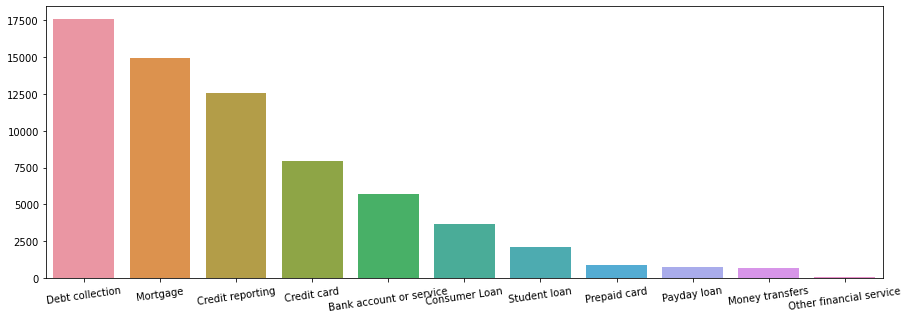

In [12]:
# Showing the number of data in each class of product column:

import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(figsize=(15,5))
sns.barplot(x=product_labels.index,y=product_labels.values)
plt.xticks(rotation=8);

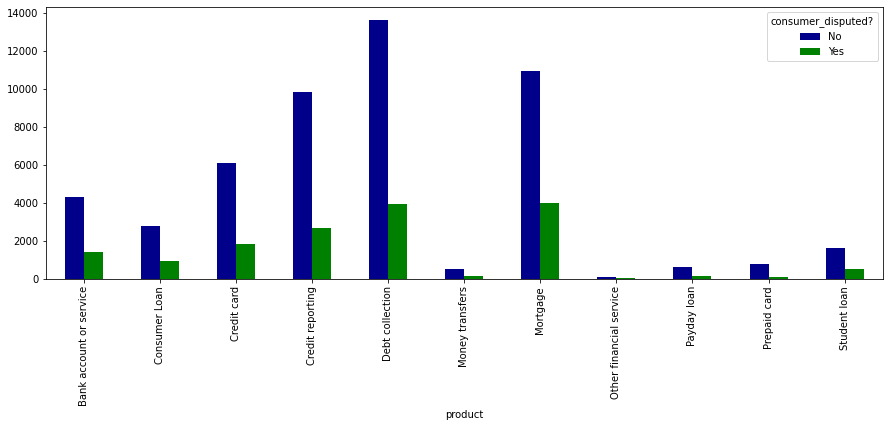

In [13]:
# The bar plot which shows number of data in each class of product column seprated by consumer disputed column:

consumer_disputed = pd.crosstab(consumers['product'],consumers['consumer_disputed?'])
consumer_disputed.plot(kind='bar', figsize=(15,5),color=('darkblue','green'));

##### It is obvious that the rate of disputes increased by complaint for each category in product column.

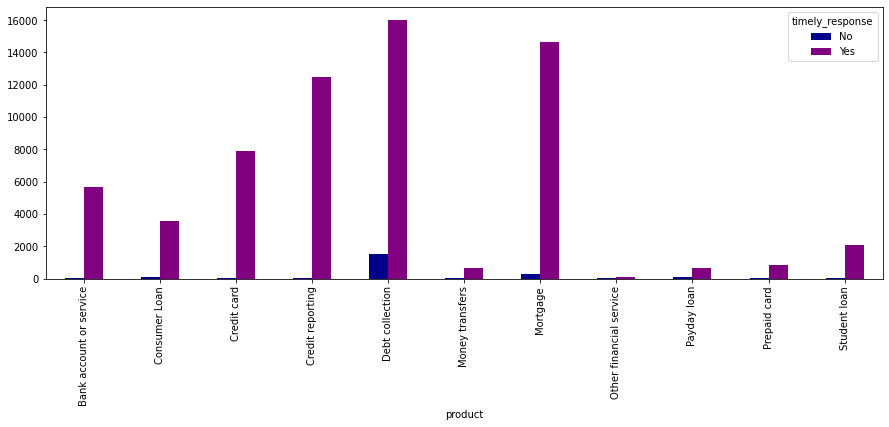

In [14]:
# The bar plot which shows number of data in each class of product column seprated by timely response column:

consumer_disputed = pd.crosstab(consumers['product'],consumers['timely_response'])
consumer_disputed.plot(kind='bar', figsize=(15,5),color=('darkblue','purple'));

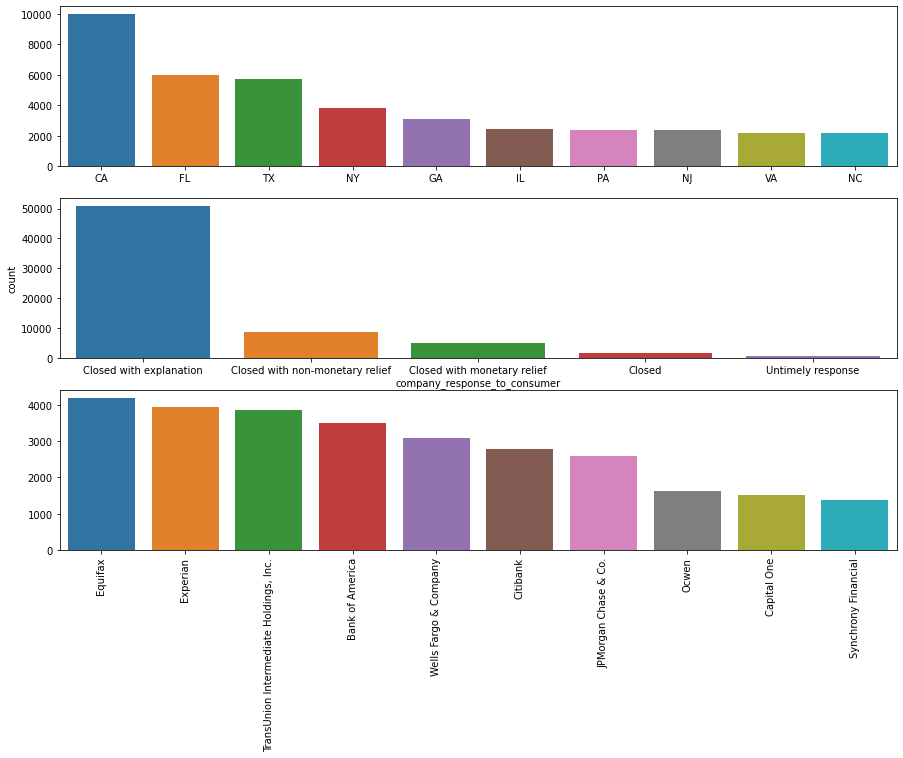

In [15]:
# Showing the number of data in each class of different columns including states, response and company:

state = consumers['state'].value_counts()[:10]
company = consumers['company'].value_counts()[:10]
company_response_to_consumer = consumers['company_response_to_consumer'].value_counts()

fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
ax1 = plt.subplot(3,1,1)
sns.barplot(state.index,state.values)

ax2 = plt.subplot(3,1,2)
sns.countplot(x='company_response_to_consumer',data=consumers)


ax3 = plt.subplot(3,1,3)
sns.barplot(company.index,company.values)
plt.xticks(rotation=90);



# Text Pre-Processing

In this section we are going to do text pre-processing on the consumer complaint narratives.

First we are going to look at the first 10 rows in "consumer complaint narrative" column, before the pre-processing:

In [16]:
# Showing the first 10 rows of consumer complaints narrative:

consumers['consumer_complaint_narrative'].head(10)

190126    XXXX has claimed I owe them {$27.00} for XXXX ...
190135    Due to inconsistencies in the amount owed that...
190155    In XX/XX/XXXX my wages that I earned at my job...
190207    I have an open and current mortgage with Chase...
190208    XXXX was submitted XX/XX/XXXX. At the time I s...
190237    Experian is reporting my OPEN and CURRENT Mort...
190238    This complaint is against Wells Fargo Bank for...
190251    I spoke to XXXX of green tree representatives ...
190263    i opened XXXX Bank of America credit cards 15-...
190264    I applied for a loan with XXXX XXXX and had pu...
Name: consumer_complaint_narrative, dtype: object

Now we are going to start the preprocessing of the "consumer complaint narrative" column. the first 10 rows will be shown after each process in pre-processing

#### Change to Lowercase

In [17]:
# Change all the texts to lowercase

consumers['consumer_complaint_narrative'] = consumers['consumer_complaint_narrative'].apply(lambda x:' '.join([i.lower() for i in x.split()]))


In [18]:
# Showing the first 10 rows of consumer complaints narrative:

consumers['consumer_complaint_narrative'].head(10)

190126    xxxx has claimed i owe them {$27.00} for xxxx ...
190135    due to inconsistencies in the amount owed that...
190155    in xx/xx/xxxx my wages that i earned at my job...
190207    i have an open and current mortgage with chase...
190208    xxxx was submitted xx/xx/xxxx. at the time i s...
190237    experian is reporting my open and current mort...
190238    this complaint is against wells fargo bank for...
190251    i spoke to xxxx of green tree representatives ...
190263    i opened xxxx bank of america credit cards 15-...
190264    i applied for a loan with xxxx xxxx and had pu...
Name: consumer_complaint_narrative, dtype: object

#### Remove Digits

In [19]:
# Removing the digits from the text

import re
consumers['consumer_complaint_narrative'] = consumers['consumer_complaint_narrative'].apply(lambda x : re.sub(r'\d+','',x))

In [20]:
# Showing the first 10 rows of consumer complaints narrative:

consumers['consumer_complaint_narrative'].head(10)

190126    xxxx has claimed i owe them {$.} for xxxx year...
190135    due to inconsistencies in the amount owed that...
190155    in xx/xx/xxxx my wages that i earned at my job...
190207    i have an open and current mortgage with chase...
190208    xxxx was submitted xx/xx/xxxx. at the time i s...
190237    experian is reporting my open and current mort...
190238    this complaint is against wells fargo bank for...
190251    i spoke to xxxx of green tree representatives ...
190263    i opened xxxx bank of america credit cards - y...
190264    i applied for a loan with xxxx xxxx and had pu...
Name: consumer_complaint_narrative, dtype: object

#### Removing Punctuations

In [21]:
# Removing Punctuations from the text

consumers['consumer_complaint_narrative'] = consumers['consumer_complaint_narrative'].str.replace(r'[^\w\s]',"")

In [22]:
# Showing the first 10 rows of consumer complaints narrative:

consumers['consumer_complaint_narrative'].head(10)

190126    xxxx has claimed i owe them  for xxxx years de...
190135    due to inconsistencies in the amount owed that...
190155    in xxxxxxxx my wages that i earned at my job d...
190207    i have an open and current mortgage with chase...
190208    xxxx was submitted xxxxxxxx at the time i subm...
190237    experian is reporting my open and current mort...
190238    this complaint is against wells fargo bank for...
190251    i spoke to xxxx of green tree representatives ...
190263    i opened xxxx bank of america credit cards  ye...
190264    i applied for a loan with xxxx xxxx and had pu...
Name: consumer_complaint_narrative, dtype: object

### Removing whitespace

After removing punctuations and digits, we can see that there are some whitespaces in our text.

In [23]:
# Removing whitespaces from the text

consumers['consumer_complaint_narrative'] = consumers['consumer_complaint_narrative'].apply(lambda x:' '.join([i.strip() for i in x.split()]))

In [24]:
# Showing the first 10 rows of consumer complaints narrative:

consumers['consumer_complaint_narrative'].head(10)

190126    xxxx has claimed i owe them for xxxx years des...
190135    due to inconsistencies in the amount owed that...
190155    in xxxxxxxx my wages that i earned at my job d...
190207    i have an open and current mortgage with chase...
190208    xxxx was submitted xxxxxxxx at the time i subm...
190237    experian is reporting my open and current mort...
190238    this complaint is against wells fargo bank for...
190251    i spoke to xxxx of green tree representatives ...
190263    i opened xxxx bank of america credit cards yea...
190264    i applied for a loan with xxxx xxxx and had pu...
Name: consumer_complaint_narrative, dtype: object

### Removing Stopwords

In [25]:
# Using NLTK library to import English stopwords
# Removing stopwords from the text

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword = stopwords.words('english')
consumers['consumer_complaint_narrative'] = consumers['consumer_complaint_narrative'].apply(lambda x:' '.join([i for i in x.split() if i not in stopword]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
# Showing the first 10 rows of consumer complaints narrative:

consumers['consumer_complaint_narrative'].head(10)

190126    xxxx claimed owe xxxx years despite proof paym...
190135    due inconsistencies amount owed told bank amou...
190155    xxxxxxxx wages earned job decreased almost hal...
190207    open current mortgage chase bank xxxx chase re...
190208    xxxx submitted xxxxxxxx time submitted complai...
190237    experian reporting open current mortgage loan ...
190238    complaint wells fargo bank violations terms co...
190251    spoke xxxx green tree representatives xxxx xxx...
190263    opened xxxx bank america credit cards years ag...
190264    applied loan xxxx xxxx purchased xxxx vehicle ...
Name: consumer_complaint_narrative, dtype: object

### Removing xxxx
In the complaints column of the dataset, names and some other confidential things are shown as xxx, so we are going to remove them from the text.

In [27]:
consumers['consumer_complaint_narrative'] = consumers['consumer_complaint_narrative'].str.replace(r'xx+\s',"")

In [28]:
# Showing the first 10 rows of consumer complaints narrative:

consumers['consumer_complaint_narrative'].head(10)

190126    claimed owe years despite proof payment sent c...
190135    due inconsistencies amount owed told bank amou...
190155    wages earned job decreased almost half knew tr...
190207    open current mortgage chase bank chase reporti...
190208    submitted time submitted complaint dealt rushm...
190237    experian reporting open current mortgage loan ...
190238    complaint wells fargo bank violations terms co...
190251    spoke green tree representatives annual escrow...
190263    opened bank america credit cards years ago int...
190264    applied loan purchased vehicle month told woul...
Name: consumer_complaint_narrative, dtype: object

### Lemmatizing

In [29]:
# Using NLTK library to import WordNetLemmatizer to lemmatize the text
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
consumers['consumer_complaint_narrative'] = consumers['consumer_complaint_narrative'].apply(lambda x:' '.join([lemmatizer.lemmatize(i) for i in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [30]:
# Showing the first 10 rows of consumer complaints narrative:

consumers['consumer_complaint_narrative'][:10]

190126    claimed owe year despite proof payment sent ca...
190135    due inconsistency amount owed told bank amount...
190155    wage earned job decreased almost half knew tro...
190207    open current mortgage chase bank chase reporti...
190208    submitted time submitted complaint dealt rushm...
190237    experian reporting open current mortgage loan ...
190238    complaint well fargo bank violation term condi...
190251    spoke green tree representative annual escrow ...
190263    opened bank america credit card year ago inter...
190264    applied loan purchased vehicle month told woul...
Name: consumer_complaint_narrative, dtype: object

### Making the complaints together

Now for each class in product column, I am going to put all the consumer complaint narratives together. So, in this way we have 7 different texts to go through them.

In order to do this, first I will write a function and then I will call the function for each class in product column.



In [31]:
# Showing the different labels in product column:

product_classes = consumers['product'].unique()
print(product_classes)

['Debt collection' 'Consumer Loan' 'Mortgage' 'Credit card'
 'Credit reporting' 'Student loan' 'Bank account or service' 'Payday loan'
 'Money transfers' 'Other financial service' 'Prepaid card']


In [32]:
# Creat a function to make the complaints together for each label:

def all_words(label):
    word = ' '.join([w for w in consumers.loc[consumers['product'].str.contains(label),'consumer_complaint_narrative']])       
    return word

In [33]:
# Call the function for each label:

text_debt_collection           = all_words('Debt collection')
text_consumer_Loan             = all_words('Consumer Loan')
text_mortgage                  = all_words('Mortgage')
text_credit_card               = all_words('Credit card')
text_credit_reporting          = all_words('Credit reporting')
text_student_loan              = all_words('Student loan')
text_bank_account_service      = all_words('Bank account or service')
text_Payday_loan               = all_words('Payday loan')
text_Money_transfers           = all_words('Money transfers')
text_Other_financial_servicee  = all_words('Other financial service')
text_Prepaid_card              = all_words('Prepaid card')

##### Here we are going to see the word distribution in each text. Therefore, by the result of this, later we can decide to choose the n-gram.
first we are going to see the distribution of each word (unigrams) and then each two words (bigrams)

In [34]:
# Unigrams:
# Using FreqDist function from NLTK library to find out the distribution of different words in each label:
# For each label, We will print the first 20 words which have the most repeatation

from nltk import FreqDist

# Debt Collection
fd_debt_collection = FreqDist(w for w in text_debt_collection.split())
print("\nDebt Collection\n", fd_debt_collection.most_common(5))

# Consumer Loan
fd_consumer_Loan = FreqDist(w for w in text_consumer_Loan.split())
print("\nConsumer Loan\n", fd_consumer_Loan.most_common(5))

# Mortgage
fd_text_mortgage = FreqDist(w for w in text_mortgage.split())
print("\nMortgage\n", fd_text_mortgage.most_common(5))

# Credit Card
fd_credit_card = FreqDist(w for w in text_credit_card.split())
print("\nCredit Card\n", fd_credit_card.most_common(5))

# Credit Reporting
fd_credit_reporting = FreqDist(w for w in text_credit_reporting.split())
print("\nCredit Reporting\n", fd_credit_reporting.most_common(5))

# Student Loan
fd_student_loan = FreqDist(w for w in text_student_loan.split())
print("\nStudent Loan\n", fd_student_loan.most_common(5))

# Bank Account Service
fd_bank_account_service = FreqDist(w for w in text_bank_account_service.split())
print("\nBank Account Service\n", fd_bank_account_service.most_common(5))

# Payday loan
fd_Payday_loan = FreqDist(w for w in text_Payday_loan.split())
print("\nPayday loan\n", fd_Payday_loan.most_common(5))

# Money transfers
fd_Money_transfers = FreqDist(w for w in text_Money_transfers.split())
print("\nMoney transfers\n", fd_Money_transfers.most_common(5))

# Other financial servicee
fd_Other_financial_servicee = FreqDist(w for w in text_Other_financial_servicee.split())
print("\nOther financial service\n", fd_Other_financial_servicee.most_common(5))

# Bank Prepaid card 
fd_Prepaid_card = FreqDist(w for w in text_Prepaid_card.split())
print("\nPrepaid card\n", fd_Prepaid_card.most_common(5))



Debt Collection
 [('debt', 27113), ('credit', 18526), ('account', 15436), ('call', 13955), ('collection', 13684)]

Consumer Loan
 [('payment', 7368), ('loan', 5683), ('credit', 4494), ('car', 3867), ('would', 3423)]

Mortgage
 [('loan', 31477), ('payment', 30493), ('mortgage', 29005), ('would', 15561), ('home', 14500)]

Credit Card
 [('credit', 20015), ('card', 18447), ('account', 14928), ('payment', 10118), ('would', 7057)]

Credit Reporting
 [('credit', 29883), ('report', 19664), ('account', 15776), ('information', 9814), ('reporting', 6845)]

Student Loan
 [('loan', 8445), ('payment', 5236), ('student', 2322), ('would', 2159), ('time', 2008)]

Bank Account Service
 [('account', 20327), ('bank', 15630), ('check', 6178), ('fee', 5671), ('would', 5328)]

Payday loan
 [('loan', 1572), ('payment', 672), ('account', 630), ('pay', 568), ('would', 516)]

Money transfers
 [('money', 1636), ('account', 1187), ('bank', 875), ('paypal', 802), ('transfer', 725)]

Other financial service
 [('che

# 
As can be seen some of the words are related to each other such as credit card, credit report, student loan and so forth.

So, we are going to try bigram to check the frequency of each two words.

In [35]:
# Bigrams:
# Using ngrams function from NLTK's util package to find out the distribution of each 2 words in each label:
# For each label, We will print the first 10 compound words which have the most repeatation

from nltk.util import ngrams

# Debt Collection
fd_debt_collection = FreqDist(w for w in ngrams(text_debt_collection.split(),2))
print("\nDebt Collection\n", fd_debt_collection.most_common(5))

# Consumer Loan
fd_consumer_Loan = FreqDist(w for w in ngrams(text_consumer_Loan.split(),2))
print("\nConsumer Loan\n", fd_consumer_Loan.most_common(5))

# Mortgage
fd_text_mortgage = FreqDist(w for w in ngrams(text_mortgage.split(),2))
print("\nMortgage\n", fd_text_mortgage.most_common(5))

# Credit Card
fd_credit_card = FreqDist(w for w in ngrams(text_credit_card.split(),2))
print("\nCredit Card\n", fd_credit_card.most_common(5))

# Credit Reporting
fd_credit_reporting = FreqDist(w for w in ngrams(text_credit_reporting.split(),2))
print("\nCredit Reporting\n", fd_credit_reporting.most_common(5))

# Student Loan
fd_student_loan = FreqDist(w for w in ngrams(text_student_loan.split(),2))
print("\nStudent Loan\n", fd_student_loan.most_common(5))

# Bank Account Service
fd_bank_account_service = FreqDist(w for w in ngrams(text_bank_account_service.split(),2))
print("\nBank Account Service\n", fd_bank_account_service.most_common(5))

# Payday loan
fd_Payday_loan = FreqDist(w for w in ngrams(text_Payday_loan.split(),2))
print("\nPayday loan\n", fd_Payday_loan.most_common(5))

# Money transfers
fd_Money_transfers = FreqDist(w for w in ngrams(text_Money_transfers.split(),2))
print("\nMoney transfers\n", fd_Money_transfers.most_common(5))

# Other financial servicee
fd_Other_financial_servicee = FreqDist(w for w in ngrams(text_Other_financial_servicee.split(),2))
print("\nOther financial servicee\n", fd_Other_financial_servicee.most_common(5))

# Bank Prepaid card 
fd_Prepaid_card = FreqDist(w for w in ngrams(text_Prepaid_card.split(),2))
print("\nPrepaid card\n", fd_Prepaid_card.most_common(5))


Debt Collection
 [(('credit', 'report'), 6250), (('collection', 'agency'), 4286), (('debt', 'collection'), 2235), (('debt', 'collector'), 2024), (('credit', 'card'), 1940)]

Consumer Loan
 [(('credit', 'report'), 952), (('well', 'fargo'), 571), (('make', 'payment'), 484), (('interest', 'rate'), 452), (('late', 'fee'), 448)]

Mortgage
 [(('well', 'fargo'), 5236), (('loan', 'modification'), 4398), (('bank', 'america'), 3200), (('mortgage', 'payment'), 3006), (('mortgage', 'company'), 2521)]

Credit Card
 [(('credit', 'card'), 8785), (('capital', 'one'), 2097), (('late', 'fee'), 1910), (('credit', 'report'), 1821), (('customer', 'service'), 1569)]

Credit Reporting
 [(('credit', 'report'), 11596), (('credit', 'bureau'), 2576), (('credit', 'reporting'), 2472), (('credit', 'card'), 1837), (('credit', 'score'), 1747)]

Student Loan
 [(('student', 'loan'), 1842), (('private', 'loan'), 629), (('interest', 'rate'), 484), (('monthly', 'payment'), 441), (('make', 'payment'), 438)]

Bank Account 

## Visualisation with Wordcloud

Now after the pre-processing of the text, we are going to find out which words repeated more than the others in each class.

in this way we are going to use 2 columns of the dataset which are "product" and "consumer complaint narrative".

for doing this process we are going to import wordcloud library.

I have used the link below to improve my code for wordcloud, but I changed it to my own code:

https://stackoverflow.com/questions/34165130/side-by-side-wordclouds-in-matplotlib

In [36]:
# Showing the name of different classes in product column:

product_classes = consumers['product'].unique()
print(product_classes)

['Debt collection' 'Consumer Loan' 'Mortgage' 'Credit card'
 'Credit reporting' 'Student loan' 'Bank account or service' 'Payday loan'
 'Money transfers' 'Other financial service' 'Prepaid card']


In [37]:
# Using wordcloud library to creat a function in order to plot the data

from wordcloud import WordCloud

def words(label):
    word = ' '.join([w for w in consumers.loc[consumers['product'].str.contains(label),'consumer_complaint_narrative']])
    cloud = WordCloud(width=1000,height=800,background_color='white',random_state=1).generate(word)
    return cloud

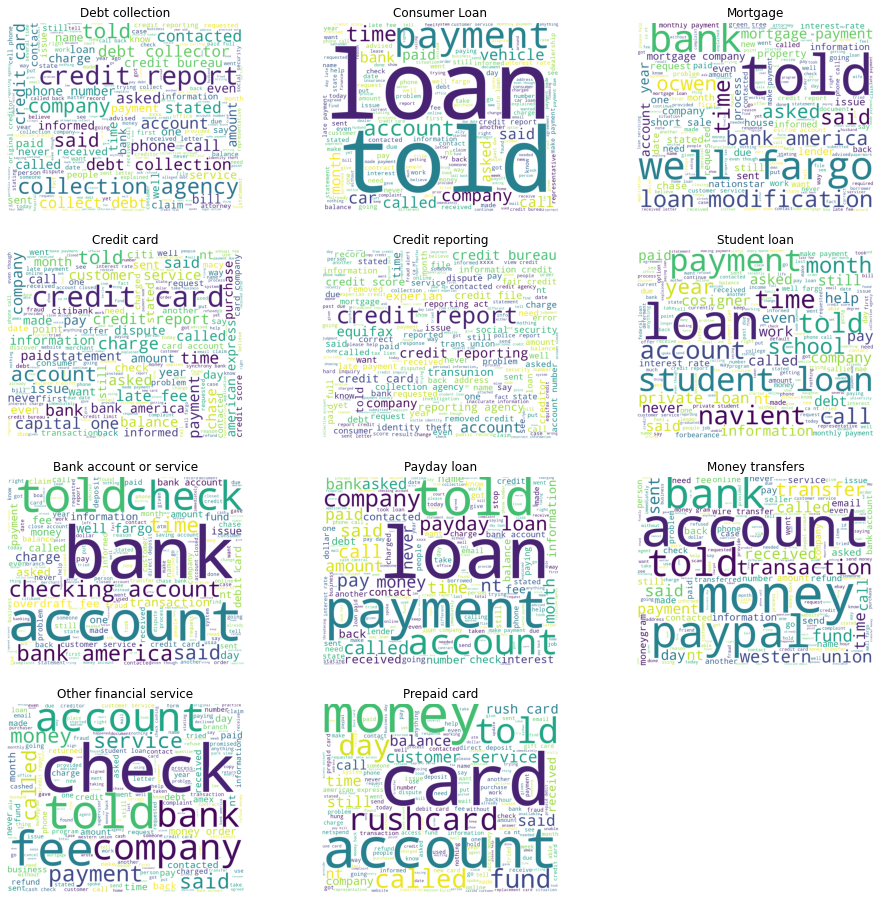

In [38]:
# Using matplotlib library and a loop, to show all the wordcloud plots in one figure:

fig = plt.figure(figsize=(16,16))
for i,j in enumerate(product_classes):
    ax = fig.add_subplot(4,3,i+1)
    wordcloud = words(j)
    plt.title(j)
    ax.imshow(wordcloud)
    ax.axis('off')

# Train-Test Split

Now we are going to split the data into train and test in order to evaluate the performance of our ML models.

We can split the data in different ways such as (60:40),(70:30),(80:20),(90:10) and so forth. Since we are going to have more amount of data to train, we are going to choose (80:20).

Here we will choose 80% of the "Consumer complaint narative" column as a training data (trainX) and 20% for test (testX) and 

also we will select 80% of "product" column as a training labels (trainY) and 20% as a test labels (testY).

In [39]:
# Using Sklearn library to split the data into train and test:

from sklearn.model_selection import train_test_split

trainX,testX,trainY,testY = train_test_split(consumers['consumer_complaint_narrative'],consumers['product'],
                                             stratify=consumers['product'], test_size = 0.20)

### Label Encoding
Since our labels are not numeric, we should use label encoding to transform them into numbers.

Reference:
    
https://medium.com/@samridhikh26/text-data-handling-machine-learning-79e47ba3a4d3

In [40]:
# Lable Encoding target variable

from sklearn import preprocessing

encoder =  preprocessing.LabelEncoder()
trainY  =  encoder.fit_transform(trainY)
testY   =  encoder.fit_transform(testY)

# Text Featurisation 

## TF-IDF:

Machine learning algorithms can not process the raw text. Therefore, we are going to convert the raw text into numbers.

In order to do this, we are going to use term frequency–inverse document frequency (TF-IDF) technique. This technique instead of calculating the counts of each word in bag of words, calculates the normalized count where each word count is divided by the number of documents this word appears.

For this, we are going to use the TfidfVectorizer function from sklearn library.

##### Choosing Unigrams or Bigrams:

From the above we can see that there are lots of bigrams that are common in more than one labels. For instance, most of the labels cosist bigrams such as "Credit report", "Credit card" and some other names including "well fargo", "bank america". 
Since these bigrams are common in several labels, it might bring a problem in training the model.
Therefore, I am going to choose unigrams for text vectorization.

References:

https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.YIBo0mdKjZs

https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

https://medium.com/analytics-vidhya/applying-text-classification-using-logistic-regression-a-comparison-between-bow-and-tf-idf-1f1ed1b83640

In [41]:
# TF-IDF Vector representation
# Setting the ngram_range to (1,1) for unigrams
# Using the default analyzer which is "word"

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer =  TfidfVectorizer(analyzer='word', max_features=5000, ngram_range=(1,1))
vectorizer.fit(consumers['consumer_complaint_narrative'])

# convert the documents into a matrix

trainX_tfidf = vectorizer.transform(trainX)
testX_tfidf  = vectorizer.transform(testX)

# Model Selection:
### Naive Bayes  - Logistic Regression -  SVM
Now I am going to use different classifiers to train my data. I will explain each algorithm in it's own section:

## Naive Bayes:

As a simple and fast classifier, The Naive Bayes classifier, classifies based on probabilities of events. It is common to use this classifier for text classification problems. Although it is a simple algorithm, it works well in many text classification problems.
The other positive point of Naive Bayes is that it has less training time. That means, less consumption of memory and CPU.
As with any machine learning model, we need to have an existing set of examples (training set) for each category (class).
We are going to classify the compllaints in to seven different classes. With the training set, we can train a Naive Bayes classifier which we can use to automatically categorize a new sentence.

Reference:

https://towardsdatascience.com/multinomial-naive-bayes-classifier-for-text-analysis-python-8dd6825ece67

https://www.mygreatlearning.com/blog/multinomial-naive-bayes-explained/

https://medium.com/analytics-vidhya/naive-bayes-classifier-for-text-classification-556fabaf252b#:~:text=The%20Naive%20Bayes%20classifier%20is,time%20and%20less%20training%20data.

In [42]:
# Importing the MultinomialNB from the sklearn's naive_bayes package:

from sklearn.naive_bayes import MultinomialNB

# Fitting the Naive Bayes into training data

NB_model = MultinomialNB()
NB_model.fit(trainX_tfidf,trainY)

# Now we will test the Logistic Regression Model on the test data

NB_model_predict = NB_model.predict(testX_tfidf)

# Here we will call the accuracy function from the sklearn's metrics package to print the accuracy of model:

from sklearn import metrics
NB_model_accuracy = metrics.accuracy_score(NB_model_predict, testY)
print ("The Accuracy of the Naive Bayes Model is {} %.".format(round(100*NB_model_accuracy,2)))

The Accuracy of the Naive Bayes Model is 79.86 %.


### Classification Report for Naive Bayes 
As can be seen, the accuracy of the Naive Bayes Model is 79.84% and now we are going to show the classification report.

In [43]:
# Showing the classification report by calling it's function from sklearn's metrics package:

from sklearn.metrics import classification_report

NB_CR = classification_report(testY, NB_model_predict,target_names=consumers['product'].unique())
print(NB_CR)

                         precision    recall  f1-score   support

        Debt collection       0.74      0.75      0.75      1142
          Consumer Loan       0.84      0.40      0.54       736
               Mortgage       0.74      0.76      0.75      1586
            Credit card       0.80      0.84      0.82      2505
       Credit reporting       0.78      0.88      0.82      3511
           Student loan       0.89      0.12      0.21       133
Bank account or service       0.86      0.95      0.90      2984
            Payday loan       0.00      0.00      0.00        22
        Money transfers       0.50      0.01      0.01       145
Other financial service       0.89      0.15      0.25       172
           Prepaid card       0.92      0.59      0.72       426

               accuracy                           0.80     13362
              macro avg       0.72      0.49      0.52     13362
           weighted avg       0.80      0.80      0.78     13362



### Confusion Matrix for Naive Bayes

Now we are going to plot the Confusion matrix using a seaborn heatmap. It is one of the best tools for evaluating and understanding the effectiveness of the model.

Referrence:

https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

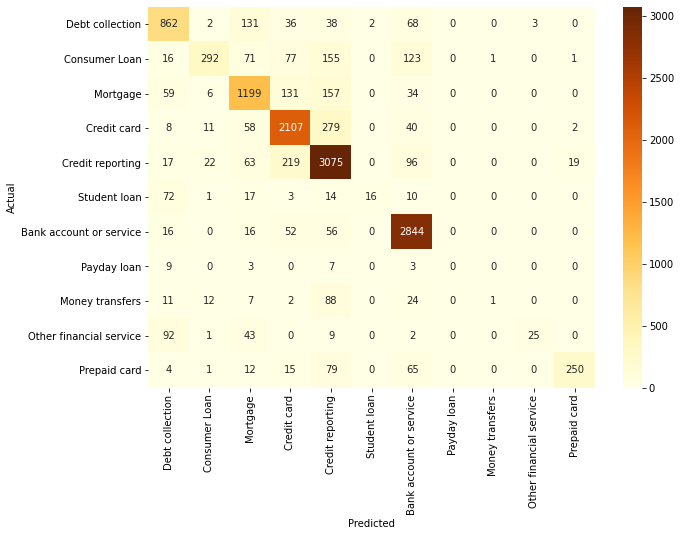

In [44]:
# First we will call the confusion matrix function  
# Then we will use our test data and the data which are predicted by the Logistic regression model, as an input

from sklearn.metrics import confusion_matrix

NB_confusion_matrix = confusion_matrix(testY, NB_model_predict)

# After that we will use the seaborn heatmap to plot the confusion matrix:

fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(NB_confusion_matrix,xticklabels=consumers['product'].unique(),yticklabels=consumers['product'].unique(),
            annot=True, fmt="d", cmap="YlOrBr")

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

We got an accuracy of approximatley 80% with Naive Bayes method.

From the above, it is clear that most of the labels are predicted pretty well. Some of the labels did not predict well such as "payday loan", "Student loan", "Money transfer" and "Other financial service". The reason is there are less amount of data for these labels compare to other labels.

Here I am going to try another method to see if I can improve the performance or not.

## Logistic Regression with GridSearchCV

Logistic Regression is a robust algorithm for correlate features. When there is a relationship between two features, Logistic regression will assign some part of the weight to the first feature and the rest for the second one. Therefore, when we have many correlated features, the logistic regression can assing more accurate probability than the other algorithms such as naive bayes. Thus, Logistic Regression generally works better on larger datasets.

Before using the logistic regression, I am going to use GridSearchCV from sklearn's model_selection package for hyperparameter tuning. First I should list hyperparameters and then the GridSearchCV helps to loop through the hyperparameters and fit the  Logistic Regression model into training data. We can also specify the number of times for the cross-validation for each hyper parameters.



References:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/grid_search.html

https://towardsdatascience.com/grid-search-for-hyperparameter-tuning-9f63945e8fec

https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5

In [45]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Creat hyperparameters:
# It should be as a dictionary with hyperparameter as a key
# Using the range of 0.001 to 100 

LR_parameters = {'C':[0.001,0.01,0.1,1,10,100]}

# Creat Grid Search:
# For the estimator we choose the Logistic Regression as our model
# Here we will use None for cv (cv=None), to use the default 5-fold cross validation
# Selecting number of jobs as -1 (n_jobs=-1). This will use all the cores available on the machine.

GS_LReg = GridSearchCV(estimator=LogisticRegression(),param_grid=LR_parameters,cv=None,n_jobs=-1)

# Fit the gridSearch on training data. Here our training data is the vectorized input (trainX_tfidf) and 
# the encoded labels (trainY):

GS_LReg.fit(trainX_tfidf,trainY)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [46]:
# After fitting the GridSearch we are going to show the Best Hyperparameter and Score:

print("Best Hyperparameter: ",GS_LReg.best_params_['C'])
print("Best Score: ", round(100*GS_LReg.best_score_,2),"%")

Best Hyperparameter:  1
Best Score:  84.63 %


###### After fiting gridSearch on our training data, we can finaly found that our best hyperparameter is "1". Also, the best score for that is 84%.
in the next stage we are going to fit the Logistic Regession with C=1.

"C" here is a inverse of regulation. it should be float and positive. before we found the best value of C by GridSearch.

In [47]:
# Fitting the Logistic Regression into training data with C=1
# This should give us the best accuracy for Logistic Regression

LR_model = LogisticRegression(C=1)
LR_model.fit(trainX_tfidf,trainY)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
# Now we are going to test the Logistic Regression Model on the test data:
# Here we will call the accuracy function from the sklearn's metrics package

LR_model_predict = LR_model.predict(testX_tfidf)
LR_model_accuracy = metrics.accuracy_score(LR_model_predict, testY)
print ("The Accuracy of the Logistic Regression Model is {} %.".format(round(100*LR_model_accuracy,2)))

The Accuracy of the Logistic Regression Model is 85.07 %.


### Classification Report for Logistic Regression
As can be seen, the accuracy of the Logistic Regression Model is 85.07% and now we are going to show the classification report.

In [49]:
# Showing the classification report by calling it's function from sklearn's metrics package:

from sklearn.metrics import classification_report
LR_report = classification_report(testY, LR_model_predict,target_names=consumers['product'].unique())
print(LR_report)

                         precision    recall  f1-score   support

        Debt collection       0.81      0.80      0.80      1142
          Consumer Loan       0.79      0.62      0.70       736
               Mortgage       0.82      0.82      0.82      1586
            Credit card       0.85      0.85      0.85      2505
       Credit reporting       0.83      0.89      0.86      3511
           Student loan       0.71      0.60      0.65       133
Bank account or service       0.93      0.95      0.94      2984
            Payday loan       0.00      0.00      0.00        22
        Money transfers       0.67      0.28      0.39       145
Other financial service       0.83      0.77      0.80       172
           Prepaid card       0.92      0.79      0.85       426

               accuracy                           0.85     13362
              macro avg       0.74      0.67      0.70     13362
           weighted avg       0.85      0.85      0.85     13362



### Confusion Matrix for Logistic Regression

Now we are going to plot the Confusion matrix using a seaborn heatmap to understand the effectiveness of the model better.

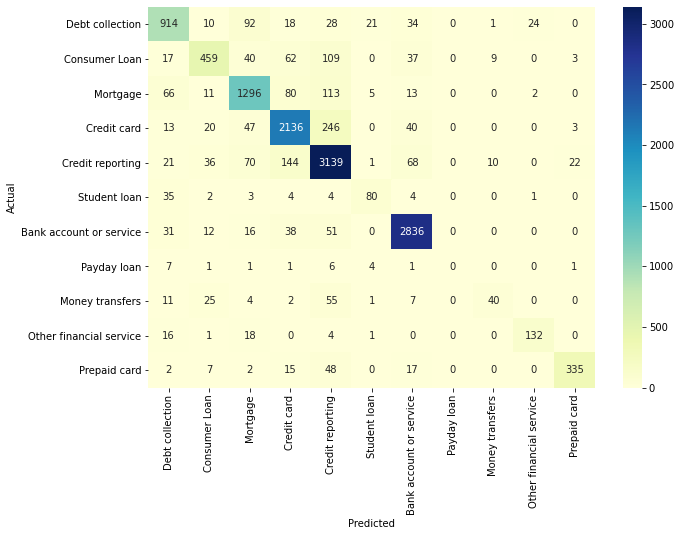

In [50]:
# First we will call the confusion matrix function  
# Then we will use our test data and the data which are predicted by the Logistic regression model, as an input

from sklearn.metrics import confusion_matrix

LR_confusion_matrix = confusion_matrix(testY, LR_model_predict)

# After that we will use the seaborn heatmap to plot the confusion matrix:

fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(LR_confusion_matrix,xticklabels=consumers['product'].unique(),yticklabels=consumers['product'].unique(),
            annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

We achieve an accuracy of 85% with Logistic Regression.

Here, with the logistic regression model, we got more accuracy for the labels which have not predicted with naive bayes model.
The only label which have not predicted by the model is payday loan. we can see that the texts of this label, predicted as "Debt collection". It shows that the texts of "payday loan" label is similar to this labels.

## Support Vector Machine with GridSearchCV
SVM is an method that specify the best decision mark between vectors that belong to a label and other vectors which are not belong to it. We can apply SVM  to all of the vectors which encode data. This means that for using the svm in text classification, we need to transform the data into vectors (as I did it before).

SVM determine the best hyperplane which divides the space and separate the vectors from each other. So, As I have transformed my data to vectors, I am going to apply the SVM algorithm to the training data and see the results.

Before using the SVM, I will use GridSearchCV for hyperparameter tuning. First I should list hyperparameters and then the GridSearchCV find the best hyperparameters by fitting the SVM model into training data. We can also specify the number of times for the cross-validation for each hyper parameters.

Reference:

https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34

https://www.educative.io/edpresso/how-to-use-svms-for-text-classification

https://www.kaggle.com/alokmalik/text-classification-using-svm

In [51]:
from sklearn.svm import LinearSVC

# Creat hyperparameters:
# It should be as a dictionary with hyperparameter as a key
# Using the range of 0.001 to 100 

SV_parameters = {'C':[0.001,0.01,0.1,1,10,100]}

# Creat Grid Search:
# For the estimator we choose the SVM as our model
# Using None for cv (cv=None), to use the default 5-fold cross validation
# Selecting number of jobs as -1 (n_jobs=-1). This will use all the cores available on the machine.
GS_SVM = GridSearchCV(estimator=LinearSVC(),param_grid=SV_parameters,cv=None,n_jobs=-1)

# Fit the gridSearch on training data.
GS_SVM.fit(trainX_tfidf,trainY)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [52]:
# Printing the best Hyperparameter and Score:

print("Best Hyperparameter: ",GS_SVM.best_params_['C'])
print("Best Score: ", round(100*GS_SVM.best_score_,2),"%")

Best Hyperparameter:  0.1
Best Score:  84.55 %


After fiting gridSearch on our training data, we can finaly found that our best hyperparameter is "0.1" with the score of 84.5%.
Now I am going to fit the SVM on my data with C = 0.1.

"C" here is a inverse of regulation. it should be float and positive. before we found the best value of C by GridSearch.

In [53]:
# Fitting the SVM into training data with C=0.1
# This should give us the best accuracy for SVM

SVM_model = LinearSVC(C=0.1)
SVM_model.fit(trainX_tfidf,trainY)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [54]:
# Test the SVM Model on the test data:
# Calling the accuracy function from the sklearn's metrics package

SVM_model_predict = SVM_model.predict(testX_tfidf)
SVM_model_accuracy = metrics.accuracy_score(SVM_model_predict, testY)
print ("The Accuracy of the Support Vector Machine Model is {} %.".format(round(100*SVM_model_accuracy,2)))

The Accuracy of the Support Vector Machine Model is 85.13 %.


### Classification Report for SVM
I got the 85.13%  accuracy with SVM. Here I am going to print the classification report.

In [55]:
# Showing the classification report by calling it's function from sklearn's metrics package:

from sklearn.metrics import classification_report
SVM_report = classification_report(testY, SVM_model_predict,target_names=consumers['product'].unique())
print(SVM_report)

                         precision    recall  f1-score   support

        Debt collection       0.81      0.80      0.80      1142
          Consumer Loan       0.81      0.61      0.70       736
               Mortgage       0.81      0.81      0.81      1586
            Credit card       0.86      0.84      0.85      2505
       Credit reporting       0.82      0.90      0.86      3511
           Student loan       0.72      0.59      0.65       133
Bank account or service       0.92      0.96      0.94      2984
            Payday loan       0.00      0.00      0.00        22
        Money transfers       0.70      0.28      0.40       145
Other financial service       0.84      0.73      0.78       172
           Prepaid card       0.91      0.83      0.87       426

               accuracy                           0.85     13362
              macro avg       0.75      0.67      0.70     13362
           weighted avg       0.85      0.85      0.85     13362



### Confusion Matrix for SVM

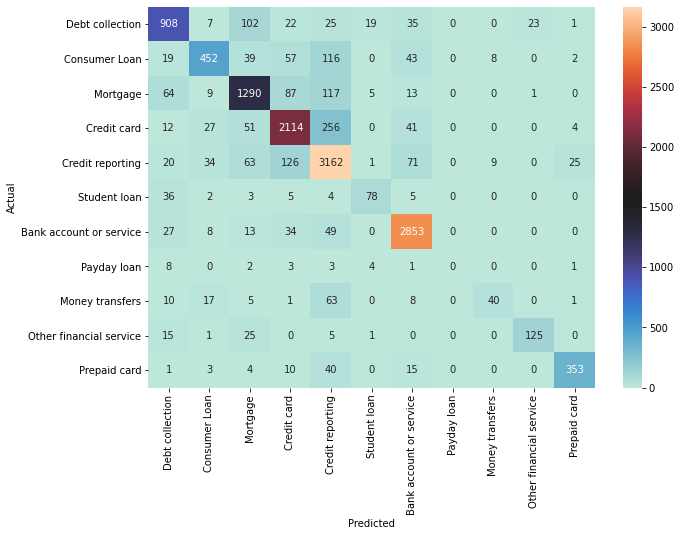

In [56]:
# First we will call the confusion matrix function  
# Then we will use our test data and the data which are predicted by the SVM, as an input

from sklearn.metrics import confusion_matrix

SVM_confusion_matrix = confusion_matrix(testY, SVM_model_predict)

# After that we will use the seaborn heatmap to plot the confusion matrix:

fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(SVM_confusion_matrix,xticklabels=consumers['product'].unique(),yticklabels=consumers['product'].unique(),
            annot=True, fmt="d", cmap="icefire")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

I got the accuracy of 85% with SVM.

The SVM model got the higher accuracy for predicting the labels which have not predicted with naive bayes model. The accuracy for other labels was also a little bit higher than the logistic regression .
Again, The only label which have not predicted by the model is payday loan.

Now for the we will try word embedding and neural networks experiment such as Convolutional Neural Nets (CNN) and utilize hyperparameter tuning to see if it helps in improvement of the performance.


# Deep Neural Networks
### CNN with pre-trained word embedding

In this section we are going to use word embeding and a Neural network on the classification project.

Word embedding is a tool to represent text where each word in the text is represented by a vector in a high-dimensional space.
Here we are going to use GloVe as a word embedding method. GloVe allows us to take a corpus of text, and intuitively transform each word in that corpus into a position in a high-dimensional space. in this way, similar words will put together.
The vectors are going to learn in the way that have similar words will represent same as each other in the vector space. 
This might be a better representation for text than the other methods like BoW, where relationships between words or tokens are ignored. The real valued vector representation for words can be learned while training the neural network. We will do this by using Keras library.

Here, We are going to use word embeddings from pre-trained GloVe. It was trained on a dataset of one billion words with a vocabulary of 400 thousand words. The glove has embedding vector sizes: 50, 100, 200 and 300 dimensions. I am going to choose the 100 and 50 dimensional ones.

In order to use Convolutional Neural Network (CNN) algorithm, I should transform the text data into vecctors, and then to 2D arrays.


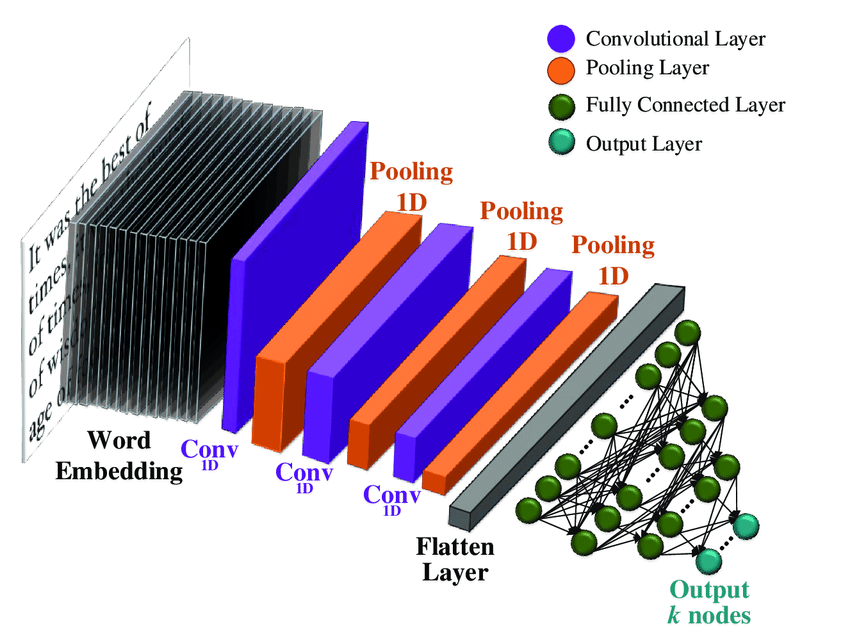


Reference:

https://github.com/elvinaqa/Text-Classification-GloVe-CNN

https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/

https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db

https://sabber.medium.com/classifying-yelp-review-comments-using-cnn-lstm-and-pre-trained-glove-word-embeddings-part-3-53fcea9a17fa

https://towardsdatascience.com/the-definitive-guide-to-bidaf-part-2-word-embedding-character-embedding-and-contextual-c151fc4f05bb

https://realpython.com/python-keras-text-classification/

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences

In [57]:
# Importing Tensorflow and Keras:

import tensorflow as tf
import keras

In [58]:
# First turning text into a sequence of integers to vectorize the text corpus

from keras.preprocessing.text import Tokenizer

# Set the maximum number of words to 25000
tokenizer = Tokenizer(num_words=25000)

# Fit Tokenizer on the training text
tokenizer.fit_on_texts(trainX.values)

# Transform the train and test text to the sequence of integers
train_sequences = tokenizer.texts_to_sequences(trainX.values)
test_sequences = tokenizer.texts_to_sequences(testX.values)

In [59]:
# Creating a dictionary with words and their index

word_index = tokenizer.word_index

# Showing the number of words in the dictionary

print('There are {} words.'.format(len(word_index)))


There are 53221 words.


#### pad_sequence and maxlen :
After transforming the text data into sequence of integers, I am going to transform those list 
of sequences (lists of numbers) into 2D arrays. The 2D array including num_samples and num_timesteps.
num_timesteps (maxlen) is the length of the longest sequence in the list. Therefore, Befor using pad_sequence function, I should find the longest sequence in the list. In order to do that, I am going to put all the text together and then by looping through the text I will find the longest sequence.

In [60]:
# Putting the train and test text together in order to find the longest sequence of words in the whole text data

import numpy as np
total_complaints = np.append(trainX.values,testX.values)

# Finding the longest sequence of words:

Max_Len = []
for i in total_complaints:
     Max_Len.append(len(i.split()))
        
max(Max_Len)

381

##### 
In this way I found the longest sequence in the list which is 381.
in the next stage I am going to use pad_sequence function from keras library.
maxlen is one of the arguments of this function. I will set this argument to 381, as I found it before.

In [61]:
# Transforming the text data into into 2D arrays by using pad_squence function from tensorflow's keras
# Setting the maxlen to 381
# Setting the padding to "post" to pad after each sequence

train_data = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=381, padding='post')
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=381, padding='post')

# Showing the shape of the 
print(train_data.shape)
print(test_data.shape)

(53444, 381)
(13362, 381)


# 
After transformation of text data into 2D arrays, now I am going to tranform my labels into 2D arrays. labels should covert to a binary class matrix.

In [62]:
# Using the to_categorical function from tensorflow's keras
# Converting train and test lables into binary class matrix

labels_train = tf.keras.utils.to_categorical(trainY)
labels_test = tf.keras.utils.to_categorical(testY)
print('Shape of data tensor:', train_data.shape)
print('Shape of label tensor:', labels_train.shape)
print('Shape of label tensor:', labels_test.shape)

Shape of data tensor: (53444, 381)
Shape of label tensor: (53444, 11)
Shape of label tensor: (13362, 11)


#### GloVe
I am going to load the GloVe word embedding file (100 dimensional one) into memory as a dictionary of word to embedding array.

In [63]:
# creating a dictionary to hold the mappings between words, and the embedding vectors.

embeddings_dict = {}

# reading the GloVe with vector size of 100 dimensions
file =  open(r"/content/drive/MyDrive/Colab Notebooks/glove.6B.100d.txt",encoding='UTF-8')

# Making a loop and going through each line in GloVe, then using split function to split each line into each components.

for line in file:
    values = line.split()
    # Setting the word equal to the first element of the split line.
    word = values[0]
    # After that converting the rest of the line into a numpy array
    vector = np.asarray(values[1:], "float32")
    # Add the new word and it's vector to the dictionary
    embeddings_dict[word] = vector

print('Found {} word vectors.'.format(len(embeddings_dict)))

Found 400000 word vectors.


# 
Next, I need to create a 2D array of one embedding for each word in the trainig data. We can do that by enumerating all unique words in the Tokenizer. word_index and locating the embedding weight vector from the loaded GloVe embedding.

In [64]:
# Creating a weight matrix for words in training data:

embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_dict.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [65]:
vocab_size = len(tokenizer.word_index)+1

#### Building Model
Here The embedding layer will be seeded with the GloVe word embedding weights. I selected the 100 dimensional, So, the embedding layer must be defined with output set to 100 dimensional. Also, I am going to set the trainable attribute for the model to be True in order to update the learned word weights in the model.

I load this embedding matrix into an Embedding layer using Sequential API to form a Convolutional NeuralNet model.
To prevent overfitting of the CNN model, I will apply dropout between the hidden layers.

I should specify the number of iterations for the model to be training. I will set the epochs to 8 see the change of loss and accuracy after each epoch.

Another parameter is the batch size. The batch size is the number of samples that are used in one forward/backward pass. This increases the speed of the computation as it need fewer epochs to run, but it also needs more memory, and the model may degrade with larger batch sizes. Since I have a large training set, I wil set this to 64:

In [66]:
# creating a function to define the CNN model:

def CNN_model_glove():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(vocab_size, 100, weights=[embedding_matrix],
                                        input_length=381, trainable=True))
    
    # 1st hidden layer
    # I will use "relu" for activation. this function will convert negative values to zero.
    model.add(tf.keras.layers.Conv1D(128, 5, activation="relu"))
    model.add(tf.keras.layers.MaxPooling1D(5)) # Size of the max pooling window (the maximum value over the window)
    model.add(tf.keras.layers.Dropout(0.3)) # Applies dropout to the input
    # Appling a transformation which maintains the mean output around the zero and the output std near to one
    model.add(tf.keras.layers.BatchNormalization()) 
    
    # 2nd hidden layer
    model.add(tf.keras.layers.Conv1D(128, 5, activation="relu"))
    model.add(tf.keras.layers.MaxPooling1D(5))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.BatchNormalization())
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation="relu"))
    
    # Output layer
    # Since we have 11 labels, I will set the output number to 11
    # The activation will be set to "softmax". this function will select the neuron with the maximum output.
    model.add(tf.keras.layers.Dense(11, activation="softmax"))
    # Compile the model
    # Set the loss to categorical_crossentropy because it is a multi-class classification problem
    model.compile(loss='categorical_crossentropy', optimizer="rmsprop", metrics=['acc'])
    return model

# Call the function
cnn_model_glove = CNN_model_glove()
# Fitting the model on train data and train labels
# Number of iterations for the model is 8 (epochs = 8)
# The batch size will set to 64
CNN_glove = cnn_model_glove.fit(train_data, labels_train, batch_size=64, epochs=10, validation_data=(test_data, labels_test))

Epoch 1/10
836/836 [==============================] - 66s 38ms/step - loss: 1.3541 - acc: 0.5669 - val_loss: 0.7815 - val_acc: 0.7448
Epoch 2/10
836/836 [==============================] - 31s 37ms/step - loss: 0.6619 - acc: 0.8004 - val_loss: 0.6517 - val_acc: 0.8115
Epoch 3/10
836/836 [==============================] - 31s 37ms/step - loss: 0.5626 - acc: 0.8282 - val_loss: 0.5804 - val_acc: 0.8270
Epoch 4/10
836/836 [==============================] - 31s 37ms/step - loss: 0.5098 - acc: 0.8445 - val_loss: 0.5805 - val_acc: 0.8311
Epoch 5/10
836/836 [==============================] - 31s 37ms/step - loss: 0.4594 - acc: 0.8607 - val_loss: 0.5543 - val_acc: 0.8420
Epoch 6/10
836/836 [==============================] - 31s 37ms/step - loss: 0.4347 - acc: 0.8654 - val_loss: 0.5846 - val_acc: 0.8468
Epoch 7/10
836/836 [==============================] - 31s 37ms/step - loss: 0.4107 - acc: 0.8750 - val_loss: 0.7143 - val_acc: 0.8130
Epoch 8/10
836/836 [==============================] - 31s 37ms

After 10 epochs, we are going to use evaluate function to find the accuracy of the model.

In [67]:
loss,acc = cnn_model_glove.evaluate(test_data,labels_test)

print("\n",'Accuracy of the model is {} %'.format("%.3f" % (acc*100)))

418/418 [==============================] - 3s 6ms/step - loss: 0.6054 - acc: 0.8438

 Accuracy of the model is 84.381 %


As you can see the accuracy of the model is 84.3 %.
Now, I will plot the graph of the training loss vs. validation loss over the number of epochs.

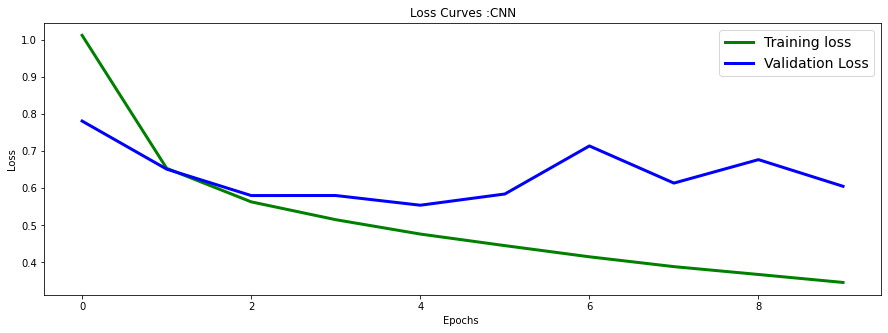

In [68]:
fig1 = plt.figure(figsize=(15,5))
plt.plot(CNN_glove.history['loss'],'g',linewidth=3.0)
plt.plot(CNN_glove.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=14)
plt.xlabel('Epochs ')
plt.ylabel('Loss')
plt.title('Loss Curves :CNN')
plt.show()

Now, I am going to plot the training accuracy vs. validation accuracy over the number of epochs.

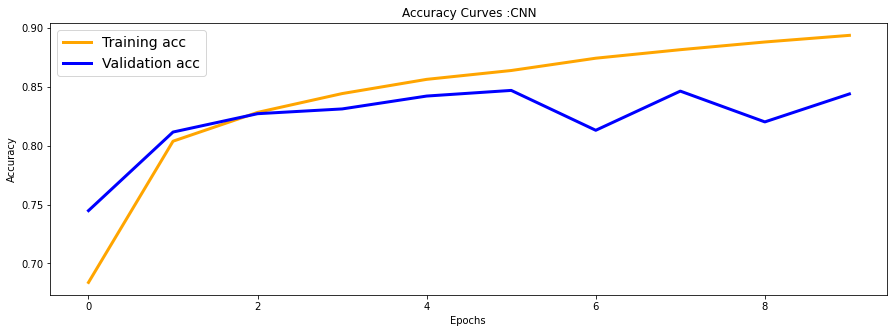

In [69]:
fig2 = plt.figure(figsize=(15,5))
plt.plot(CNN_glove.history['acc'],'orange',linewidth=3.0)
plt.plot(CNN_glove.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training acc', 'Validation acc'],fontsize=14)
plt.xlabel('Epochs ')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves :CNN')
plt.show()

# 
From the above plots, we can see that, after 2 epochs the CNN tends to be overfitting the training data and therefore we need to implement early stopping to prevent overfitting and tune the number of epochs during training.
It is also shows that after 6 epochs we got the highest accuracy and after that, althogh the accuracy of the model had some fluctuations, it is obvious that the accuracy would not increase any more by increasing the epochs.

### Classification Report for CNN with pre-trained word embedding:
As can be seen, the accuracy of the CNN with pre-trained word embedding (GloVe) Model is 84.4 % and now we are going to show the classification report.

For this, first I am going to call the predict function for the model, and then print the classification report.

In [70]:
from sklearn.metrics import classification_report

# Predictions on test data
cnn_glove_predict=cnn_model_glove.predict(test_data)

# Classification Report
cnn_glove_report = classification_report(labels_test, cnn_glove_predict.round(),
                            target_names=consumers['product'].unique())
print(cnn_glove_report)

                         precision    recall  f1-score   support

        Debt collection       0.86      0.71      0.78      1142
          Consumer Loan       0.83      0.56      0.67       736
               Mortgage       0.86      0.76      0.81      1586
            Credit card       0.89      0.84      0.86      2505
       Credit reporting       0.81      0.90      0.86      3511
           Student loan       0.70      0.51      0.59       133
Bank account or service       0.96      0.91      0.94      2984
            Payday loan       0.00      0.00      0.00        22
        Money transfers       0.51      0.27      0.35       145
Other financial service       0.70      0.86      0.77       172
           Prepaid card       0.93      0.80      0.86       426

              micro avg       0.87      0.82      0.85     13362
              macro avg       0.73      0.65      0.68     13362
           weighted avg       0.87      0.82      0.84     13362
            samples avg

From the classification report we can that most of the labels predictedd pretty well but again the model could not predict the "payday loan" due to the less amount of data for this label. On the other hand, "bank account service" had the hight accuracy with 94%.

# CNN without weight matrix:
Now I am going to simply try to change the Embedding layer. CNN can automatically learn a large number of weights in a training dataset in classification. The CNN model, Now, will learn it's weights during training instead of using a pre-trained word embeddings and build a small 1D convnet to predict the labels.

In [71]:
# Again I will creat a function to define the CNN model
# This time I do not use the weight matrix
# This model will learn its weights during training

def CNN_model_without_weight_matrix():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(vocab_size, 100, input_length=381))
    model.add(tf.keras.layers.Dropout(0.3))
    
    # 1st hidden layer
    # using "relu" for activation to convert negative values to zero.
    model.add(tf.keras.layers.Conv1D(128, 5, activation="relu"))
    model.add(tf.keras.layers.MaxPooling1D(5)) # Size of the max pooling window (the maximum value over the window)
    model.add(tf.keras.layers.Dropout(0.3))  # Applies dropout to the input
    # Appling a transformation which maintains the mean output around the zero and the output std near to one
    model.add(tf.keras.layers.BatchNormalization())
    
    
    # 2nd hidden layer
    model.add(tf.keras.layers.Conv1D(128, 5, activation="relu"))
    model.add(tf.keras.layers.MaxPooling1D(5))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.BatchNormalization())
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation="relu"))
    
    # Output layer
    # Since we have 7 labels, I will set the output number to 7
    # The activation will be set to "softmax". this function will select the neuron with the maximum output.
    model.add(tf.keras.layers.Dense(11, activation="softmax"))
    # Compile the model
    # Set the loss to categorical_crossentropy because it is a multi-class classification problem
    model.compile(loss='categorical_crossentropy', optimizer="rmsprop", metrics=['acc'])
    return model

# Call the function
cnn_model1 = CNN_model_without_weight_matrix()
# Fitting the model on train data and train labels
# Number of iterations for the model is 10 (epochs = 10)
# The batch size will set to 64
CNN = cnn_model1.fit(train_data, labels_train, batch_size=64, epochs=10, validation_data=(test_data, labels_test))

Epoch 1/10
836/836 [==============================] - 33s 38ms/step - loss: 1.4057 - acc: 0.5389 - val_loss: 0.6251 - val_acc: 0.8174
Epoch 2/10
836/836 [==============================] - 31s 37ms/step - loss: 0.6176 - acc: 0.8184 - val_loss: 0.5778 - val_acc: 0.8351
Epoch 3/10
836/836 [==============================] - 31s 37ms/step - loss: 0.5322 - acc: 0.8426 - val_loss: 0.5700 - val_acc: 0.8433
Epoch 4/10
836/836 [==============================] - 31s 37ms/step - loss: 0.4935 - acc: 0.8563 - val_loss: 0.5296 - val_acc: 0.8490
Epoch 5/10
836/836 [==============================] - 31s 38ms/step - loss: 0.4633 - acc: 0.8605 - val_loss: 0.6447 - val_acc: 0.8440
Epoch 6/10
836/836 [==============================] - 31s 37ms/step - loss: 0.4549 - acc: 0.8636 - val_loss: 0.5626 - val_acc: 0.8521
Epoch 7/10
836/836 [==============================] - 31s 37ms/step - loss: 0.4333 - acc: 0.8699 - val_loss: 0.5807 - val_acc: 0.8517
Epoch 8/10
836/836 [==============================] - 31s 37ms

After this we are going to evaluate the model on test data to find the accuracy of the model

In [72]:
# Evaluating the model on test data
loss,acc = cnn_model1.evaluate(test_data,labels_test)

print("\n",'Accuracy of the model is {} %'.format("%.3f" % (acc*100)))

418/418 [==============================] - 2s 5ms/step - loss: 0.6331 - acc: 0.8550

 Accuracy of the model is 85.496 %


As you can see the accuracy of the model is 85.5 %.

Here, I am going to plot the loss and accuracy curves on training and validation data over the number of epochs.

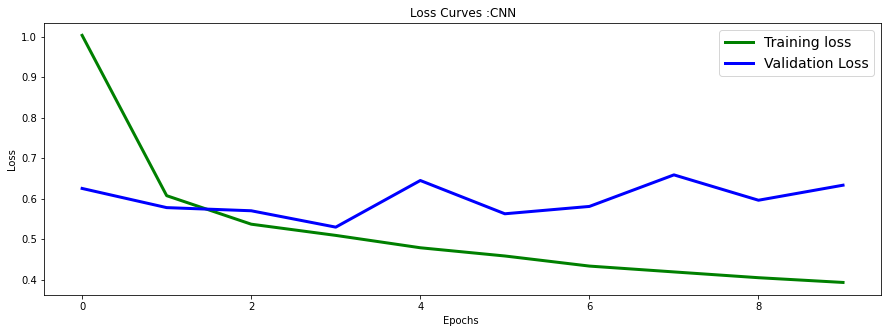

In [73]:
fig1 = plt.figure(figsize=(15,5))
plt.plot(CNN.history['loss'],'g',linewidth=3.0)
plt.plot(CNN.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=14)
plt.xlabel('Epochs ')
plt.ylabel('Loss')
plt.title('Loss Curves :CNN')
plt.show()

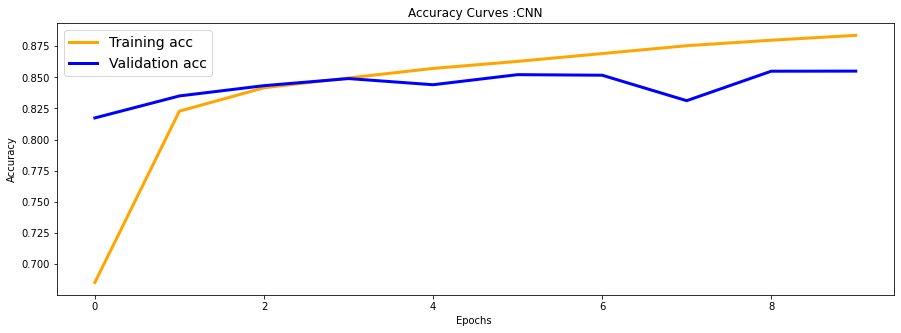

In [74]:
fig2 = plt.figure(figsize=(15,5))
plt.plot(CNN.history['acc'],'orange',linewidth=3.0)
plt.plot(CNN.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training acc', 'Validation acc'],fontsize=14)
plt.xlabel('Epochs ')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves :CNN')
plt.show()

The accuracy increased to 84.3% and after 3 epochs, Although the model going to be overfitting the training data after 3 epochs, the accuracy of the model increased to 85.5% after 10 epochs. It means that that the accuracy might increase if we increase the number of epochs.

### Classification Report for CNN

In [75]:
# Predictions on test data
predicted=cnn_model1.predict(test_data)

# Classification Report
cnn1_report = classification_report(labels_test, predicted.round(),
                            target_names=consumers['product'].unique())
print(cnn1_report)

                         precision    recall  f1-score   support

        Debt collection       0.83      0.75      0.79      1142
          Consumer Loan       0.78      0.69      0.73       736
               Mortgage       0.84      0.80      0.82      1586
            Credit card       0.87      0.88      0.87      2505
       Credit reporting       0.86      0.87      0.86      3511
           Student loan       0.67      0.51      0.58       133
Bank account or service       0.95      0.94      0.95      2984
            Payday loan       0.00      0.00      0.00        22
        Money transfers       0.65      0.28      0.39       145
Other financial service       0.82      0.73      0.78       172
           Prepaid card       0.88      0.85      0.86       426

              micro avg       0.87      0.85      0.86     13362
              macro avg       0.74      0.66      0.69     13362
           weighted avg       0.87      0.85      0.85     13362
            samples avg

From above, it is obvious that we got better accuracy than the model which used pre-trained word embeddings. Most of the labels predictedd well but again the model could not predict the "payday loan" due to the less amount of data for this label. On the other hand, "bank account service" had the hight accuracy with 95%.

# Classification with LSTM (RNN)

Long Short Term Memory networks (LSTM) is an artificial RNN architecture which is used in for deep learning. LSTM is designed to address the problem of long-term dependency. It remembers the information for long periods of time.

All RNNs have the form of a chain of repeating modules of neural network. LSTMs also have this chain, but with the different structure in repeating module. Instead of having a single neural network layer, there are four, interacting in a very special way.

I am going to use the bidirectional LSTM which will run the inputs in 2 ways, past to future and future to past and because of that, bidirectional LSTMs always work better thatn normal LSTMs.

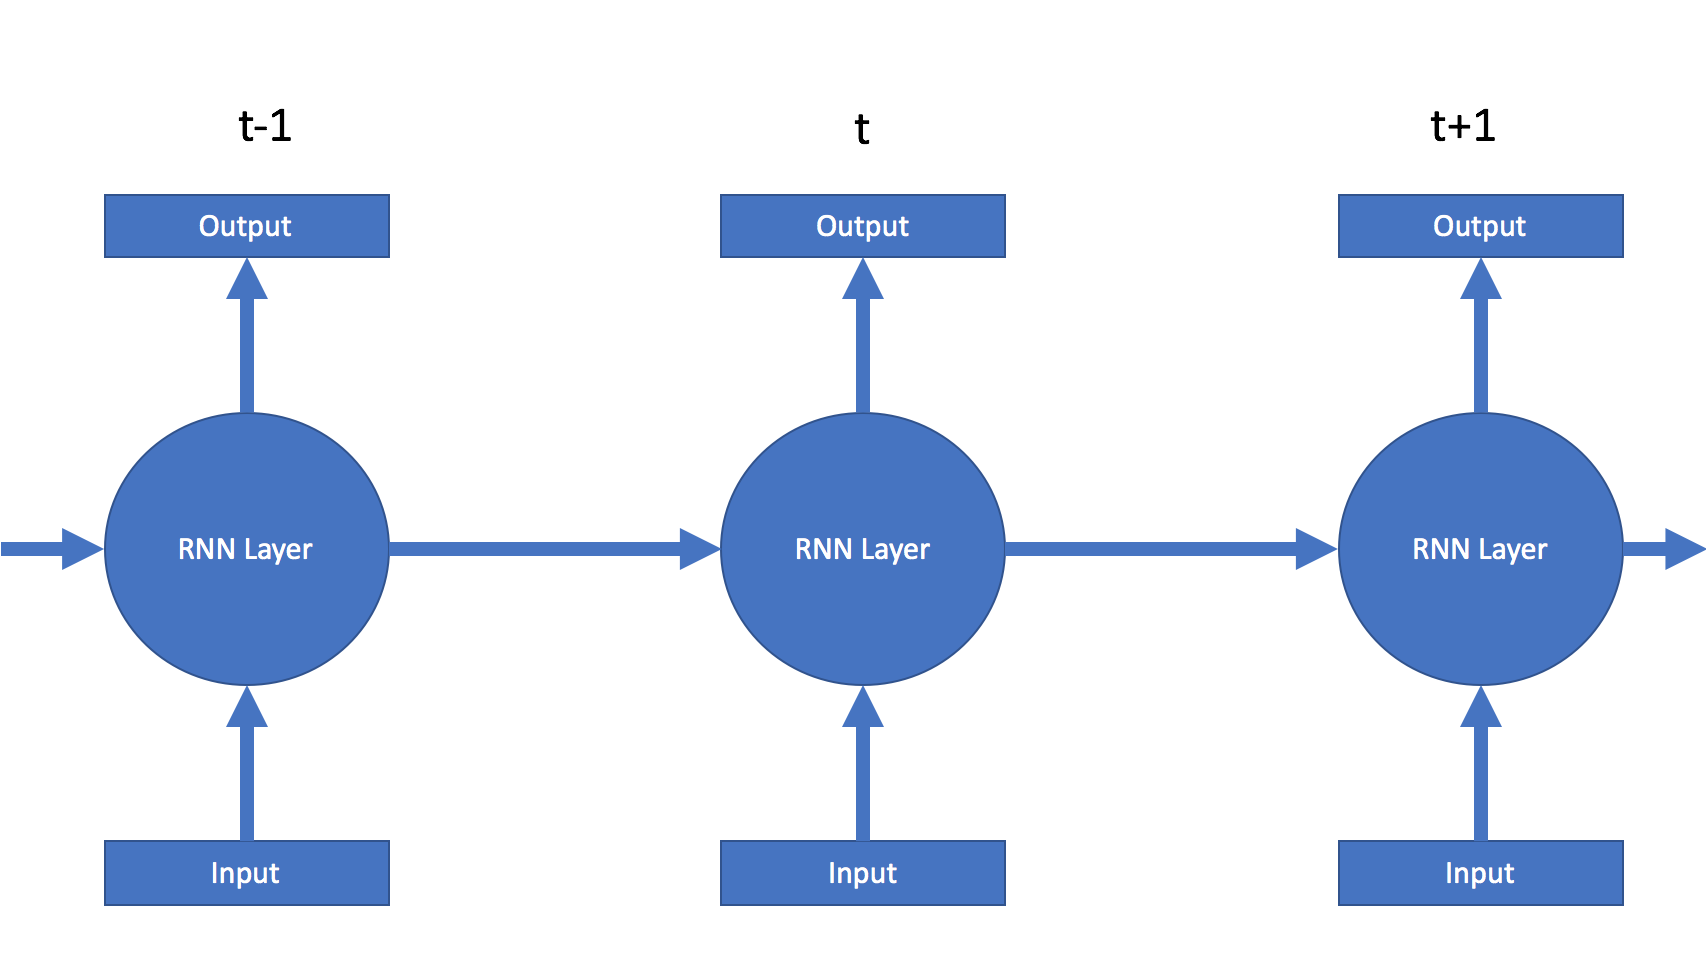



Reference:

https://realpython.com/python-keras-text-classification/

https://www.kaggle.com/kredy10/simple-lstm-for-text-classification

https://www.tensorflow.org/tutorials/text/text_classification_rnn

https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17

In [77]:
def RNN_model():
    model = tf.keras.models.Sequential()
    
    # The embedded layer that uses 100 length vectors to represent words
    model.add(tf.keras.layers.Embedding(vocab_size,100,weights=[embedding_matrix],input_length=381,trainable=True))
    
    # The LSTM layer with 100 memory units
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)))
    
    # The output layer will be 11 output values
    # Activation function is sigmoid which convert the input into a value between 0.0 and 1.0.
    model.add(tf.keras.layers.Dense(11,activation='sigmoid'))
    # Set the loss to categorical_crossentropy because it is a multi-class classification problem.
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics = ['accuracy'])
    return model

RNN_model = RNN_model()
RNN =RNN_model.fit(train_data, labels_train, batch_size=64, epochs=10, validation_data=(test_data, labels_test))


Epoch 1/10
836/836 [==============================] - 58s 67ms/step - loss: 1.0445 - accuracy: 0.6699 - val_loss: 0.6265 - val_accuracy: 0.8026
Epoch 2/10
836/836 [==============================] - 55s 66ms/step - loss: 0.5152 - accuracy: 0.8424 - val_loss: 0.5008 - val_accuracy: 0.8473
Epoch 3/10
836/836 [==============================] - 55s 66ms/step - loss: 0.4362 - accuracy: 0.8658 - val_loss: 0.4468 - val_accuracy: 0.8612
Epoch 4/10
836/836 [==============================] - 55s 66ms/step - loss: 0.3813 - accuracy: 0.8794 - val_loss: 0.4508 - val_accuracy: 0.8648
Epoch 5/10
836/836 [==============================] - 55s 66ms/step - loss: 0.3378 - accuracy: 0.8948 - val_loss: 0.4587 - val_accuracy: 0.8580
Epoch 6/10
836/836 [==============================] - 55s 66ms/step - loss: 0.3008 - accuracy: 0.9063 - val_loss: 0.4699 - val_accuracy: 0.8555
Epoch 7/10
836/836 [==============================] - 55s 66ms/step - loss: 0.2669 - accuracy: 0.9161 - val_loss: 0.4593 - val_accuracy:

In [78]:
# Evaluating the model on test data
loss,acc = RNN_model.evaluate(test_data,labels_test)

print("\n",'Accuracy of the RNN model is {} %'.format("%.3f" % (acc*100)))

418/418 [==============================] - 6s 15ms/step - loss: 0.5256 - accuracy: 0.8591

 Accuracy of the RNN model is 85.908 %


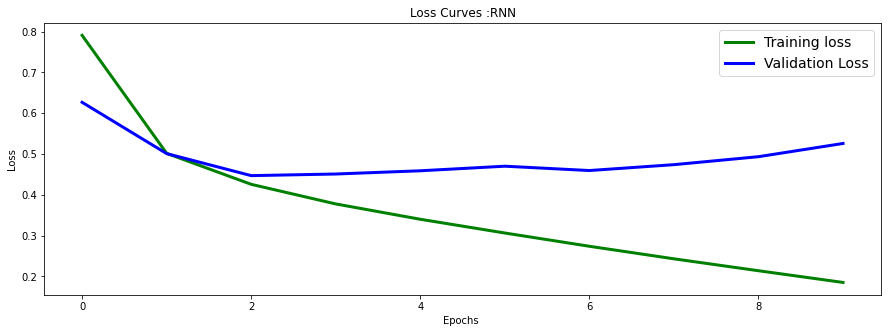

In [79]:
fig1 = plt.figure(figsize=(15,5))
plt.plot(RNN.history['loss'],'g',linewidth=3.0)
plt.plot(RNN.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=14)
plt.xlabel('Epochs ')
plt.ylabel('Loss')
plt.title('Loss Curves :RNN')
plt.show()

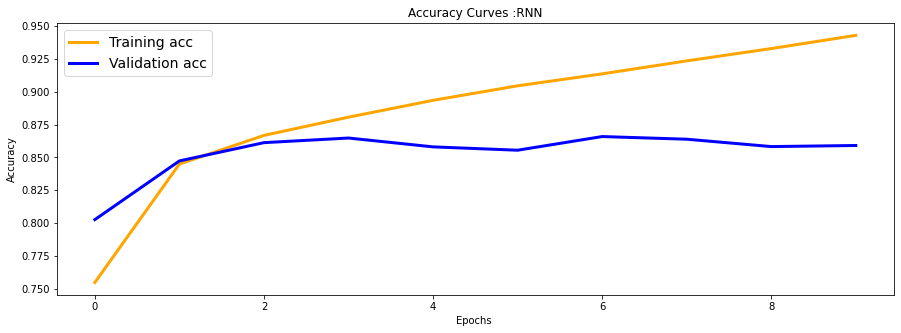

In [80]:
fig2 = plt.figure(figsize=(15,5))
plt.plot(RNN.history['accuracy'],'orange',linewidth=3.0)
plt.plot(RNN.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training acc', 'Validation acc'],fontsize=14)
plt.xlabel('Epochs ')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves :RNN')
plt.show()

From the above plots, we can see that, after 2 epochs the LSTM started to overfit the training data. Thus we need to implement early stopping to prevent overfitting and tune the number of epochs during training. It is also shows that after 2 epochs the loss of validation data started to increase. So, here we should not increase the number of epochs. The accuracy of this model also reached to 86% after 6 epochs.

### Classification Report for LSTM

In [81]:
#predictions on test data
RNN_predicted=RNN_model.predict(test_data)

# Classification Report
RNN_report = classification_report(labels_test, RNN_predicted.round(),target_names=consumers['product'].unique())
print(RNN_report)


                         precision    recall  f1-score   support

        Debt collection       0.24      0.96      0.38      1142
          Consumer Loan       0.17      0.93      0.28       736
               Mortgage       0.40      0.96      0.56      1586
            Credit card       0.52      0.97      0.68      2505
       Credit reporting       0.39      0.99      0.56      3511
           Student loan       0.21      0.86      0.34       133
Bank account or service       0.72      0.99      0.84      2984
            Payday loan       0.02      0.36      0.05        22
        Money transfers       0.13      0.86      0.23       145
Other financial service       0.27      0.99      0.42       172
           Prepaid card       0.56      0.92      0.70       426

              micro avg       0.39      0.97      0.56     13362
              macro avg       0.33      0.89      0.46     13362
           weighted avg       0.46      0.97      0.61     13362
            samples avg

# Deep Learning Using Bert:

Now, I am going do the classification task using Transformers library and Keras with tensorflow backend. Therefore, I will use a BERT model from Transformer as a layer in a Tensorflow model.

I am going to use Huggingface Transformers because Transformers makes it easy to switch between modelssuch as BERT, ALBERT, XLnet and so forth. it means that I can easily swith the algorithm by changing the model in my code.

Here, again, I am going to import the dataset and do the text preprocessing on it. Then, I am going to remove all the columns except three columns including ‘Consumer complaint narrative’, ‘Product’ and ‘Issue’.

In this part, same as before, my input will bethe ‘Consumer complaint narrative’, but my outputs will be two columns including ‘Product’ and ‘Issue’. 

Reference:

https://huggingface.co/bert-base-uncased

https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270

https://www.kaggle.com/thebrownviking20/bert-multiclass-classification

https://github.com/AmalVijayan/BERT-For-Multi-Class-Classification

In [83]:
consumers = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/consumer_complaints.csv')
# Select required columns
consumers = consumers[['consumer_complaint_narrative', 'product', 'issue']]
# Remove a row if any of the three remaining columns are missing
consumers = consumers.dropna()


consumers['consumer_complaint_narrative'] = consumers['consumer_complaint_narrative'].apply(lambda x:' '.join([i.lower() for i in x.split()]))

consumers['consumer_complaint_narrative'] = consumers['consumer_complaint_narrative'].apply(lambda x : re.sub(r'\d+','',x))

consumers['consumer_complaint_narrative'] = consumers['consumer_complaint_narrative'].str.replace(r'[^\w\s]',"")

consumers['consumer_complaint_narrative'] = consumers['consumer_complaint_narrative'].apply(lambda x:' '.join([i.strip() for i in x.split()]))

stopword = stopwords.words('english')
consumers['consumer_complaint_narrative'] = consumers['consumer_complaint_narrative'].apply(lambda x:' '.join([i for i in x.split() if i not in stopword]))

consumers['consumer_complaint_narrative'] = consumers['consumer_complaint_narrative'].str.replace(r'xx+\s',"")

lemmatizer = WordNetLemmatizer()
consumers['consumer_complaint_narrative'] = consumers['consumer_complaint_narrative'].apply(lambda x:' '.join([lemmatizer.lemmatize(i) for i in x.split()]))



Now, the dataset is imported again and all the text preprocessing have done.
Here I am going to add two columns to the dataset which are "issue_label" and "product_label". this columns will contain the categorical form of the "issue" and "product" column.

In [84]:
# Remove rows, where the label is present only ones (can't be split)
consumers = consumers.groupby('issue').filter(lambda x : len(x) > 1)
consumers = consumers.groupby('product').filter(lambda x : len(x) > 1)
# Set your model output as categorical and save in new label col
consumers['issue_label'] = pd.Categorical(consumers['issue'])
consumers['product_label'] = pd.Categorical(consumers['product'])
# Transform your output to numeric
consumers['issue'] = consumers['issue_label'].cat.codes
consumers['product'] = consumers['product_label'].cat.codes
# Split into train and test - stratify over Issue
data, data_test = train_test_split(consumers, test_size = 0.2, stratify = consumers[['issue']])

first I am going to import the Bert model and tokenizer form the transformers library. Then, by using tokenizer I will transform my texts into BERT tokens. After that I will pad and truncate them to my maximum length. Lastly, I am going to load the BERT model which is the 12-layer bert-base-uncased. This model is a pre-trained model on English language using a masked language modeling (MLM) objective.

In [86]:
from transformers import TFBertModel, BertConfig, BertTokenizerFast

# Name of the BERT model to use
model_name = 'bert-base-uncased'
# Max length of tokens
max_length = 100
# Load transformers config and set output_hidden_states to False
config = BertConfig.from_pretrained(model_name)
config.output_hidden_states = False
# Load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path = model_name, config = config)
# Load the Transformers BERT model
transformer_model = TFBertModel.from_pretrained(model_name, config = config)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


### Building the model
Now I a going to build the model. The Transformers library, contains several BERT classification models and the famous one is BertModel. Another model in this library is TFBertForSequenceClassification which is for sequence classification. I am going to start by loading a BERT model and then add a dropout and a dense layer.

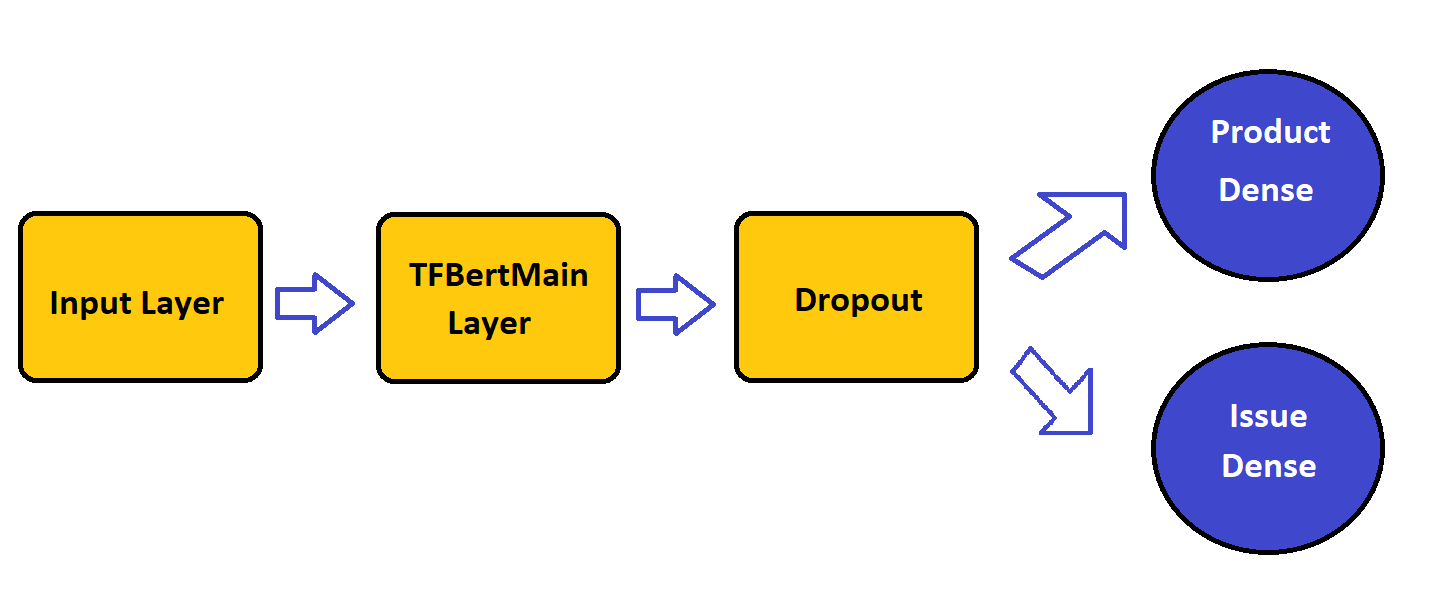

In [87]:
# Load the MainLayer
bert = transformer_model.layers[0]

# Input layer
input_ids = tf.keras.layers.Input(shape=(max_length,), name='input_ids', dtype='int32')
inputs = {'input_ids': input_ids}

# Loading the Transformers BERT model as a layer
bert_model = bert(inputs)[1]
dropout = tf.keras.layers.Dropout(config.hidden_dropout_prob, name='pooled_output')
pooled_output = dropout(bert_model, training=False)

# Output layer
# Define the Issue output
issue = tf.keras.layers.Dense(units=len(data.issue_label.value_counts()), 
                              kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=config.initializer_range),
                              name='issue')(pooled_output)
# Define the product output
product = tf.keras.layers.Dense(units=len(data.product_label.value_counts()), 
                                kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=config.initializer_range),
                                name='product')(pooled_output)
# Define a dictionary for outputs
outputs = {'issue': issue, 'product': product}

# And combine it all in a model object
model = tf.keras.models.Model(inputs=inputs, outputs=outputs, name='BERT_MultiLabel_MultiClass')
# Take a look at the model
model.summary()

Model: "BERT_MultiLabel_MultiClass"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 100)]        0                                            
__________________________________________________________________________________________________
bert (TFBertMainLayer)          TFBaseModelOutputWit 109482240   input_ids[0][0]                  
__________________________________________________________________________________________________
pooled_output (Dropout)         (None, 768)          0           bert[0][1]                       
__________________________________________________________________________________________________
issue (Dense)                   (None, 87)           66903       pooled_output[0][0]              
_________________________________________________________________________

### Compiling the model
Now I am going to compile the model which I built before and fit it on my data. Here I am going to use the Adam optimizer which is used for optimizing the loss function for neural network. It has 4 different parameters such as stepsize, forgetting factor and so forth. I will set all the parameters to the default.

In [88]:
# define loss and metrics
loss = {'issue': tf.keras.losses.CategoricalCrossentropy(from_logits = True),
        'product': tf.keras.losses.CategoricalCrossentropy(from_logits = True)}
metric = {'issue': tf.keras.metrics.CategoricalAccuracy('accuracy'),
          'product': tf.keras.metrics.CategoricalAccuracy('accuracy')}

# Compile the model
# Set an optimizer to Adam
# Set the loss and metrics
model.compile(optimizer = tf.keras.optimizers.Adam(),loss = loss,metrics = metric)

# Using the to_categorical function from tensorflow's keras
# Converting lables into binary class matrix
y_issue = tf.keras.utils.to_categorical(data['issue'])
y_product = tf.keras.utils.to_categorical(data['product'])

# Tokenize the input (takes some time)
x = tokenizer(text=data['consumer_complaint_narrative'].to_list(),add_special_tokens=True, max_length=100, 
              truncation=True, padding=True, return_tensors='tf', return_token_type_ids = False,
              return_attention_mask = False, verbose = True)

# Fit the model
BERT_model = model.fit(x={'input_ids': x['input_ids']}, y={'issue': y_issue, 'product': y_product}, validation_split=0.2,
                    batch_size=64, epochs=5)

Epoch 1/5
669/669 [==============================] - 902s 1s/step - loss: 5.4666 - issue_loss: 3.5268 - product_loss: 1.9398 - issue_accuracy: 0.1095 - product_accuracy: 0.2431 - val_loss: 5.3308 - val_issue_loss: 3.4255 - val_product_loss: 1.9053 - val_issue_accuracy: 0.1287 - val_product_accuracy: 0.2604
Epoch 2/5
669/669 [==============================] - 881s 1s/step - loss: 5.3437 - issue_loss: 3.4376 - product_loss: 1.9061 - issue_accuracy: 0.1178 - product_accuracy: 0.2538 - val_loss: 5.3252 - val_issue_loss: 3.4267 - val_product_loss: 1.8985 - val_issue_accuracy: 0.1287 - val_product_accuracy: 0.2604
Epoch 3/5
669/669 [==============================] - 884s 1s/step - loss: 5.3283 - issue_loss: 3.4288 - product_loss: 1.8995 - issue_accuracy: 0.1199 - product_accuracy: 0.2572 - val_loss: 5.3268 - val_issue_loss: 3.4222 - val_product_loss: 1.9046 - val_issue_accuracy: 0.1090 - val_product_accuracy: 0.2604
Epoch 4/5
669/669 [==============================] - 883s 1s/step - loss: 5.

After fiiting the model on training data with 5 epochs, I am going to evaluate it on my test data to see the result.

In [89]:
# Using the to_categorical function from tensorflow's keras
# Converting test data into binary class matrix 

test_y_issue = tf.keras.utils.to_categorical(data_test['issue'])
test_y_product = tf.keras.utils.to_categorical(data_test['product'])
test_x = tokenizer(text=data_test['consumer_complaint_narrative'].to_list(), add_special_tokens=True,
    max_length=max_length, truncation=True, padding=True, return_tensors='tf', return_token_type_ids = False,
    return_attention_mask = False, verbose = True)

In [90]:
# Evaluating the model
model_eval = model.evaluate(x={'input_ids': test_x['input_ids']},
                            y={'issue': test_y_issue, 'product': test_y_product})

418/418 [==============================] - 88s 211ms/step - loss: 5.3067 - issue_loss: 3.4112 - product_loss: 1.8955 - issue_accuracy: 0.1250 - product_accuracy: 0.2626


As we can see, I got 12.5% and 26% of accuracy for issue and product, respectively. Compare to other algorithms which have done before, The accuracy of this model is very low. I am going to see the plots of this model to understand it better.

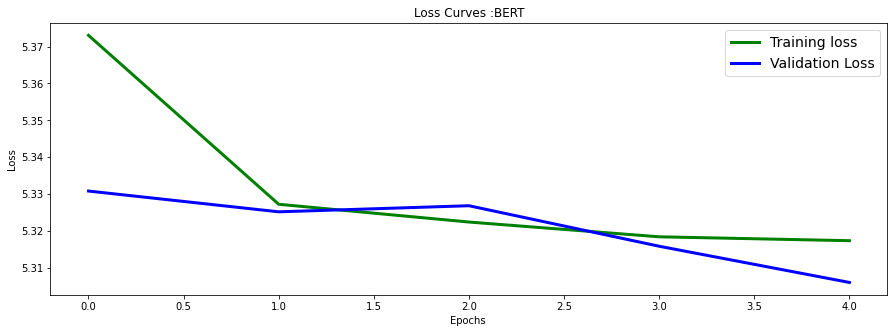

In [91]:
fig1 = plt.figure(figsize=(15,5))
plt.plot(BERT_model.history['loss'],'g',linewidth=3.0)
plt.plot(BERT_model.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=14)
plt.xlabel('Epochs ')
plt.ylabel('Loss')
plt.title('Loss Curves :BERT')
plt.show()

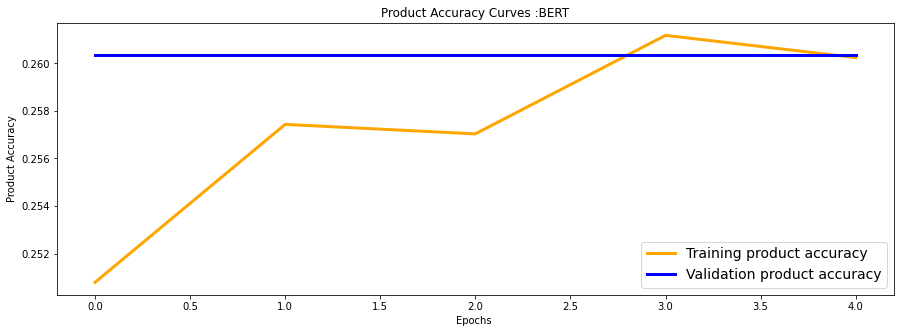

In [96]:
fig1 = plt.figure(figsize=(15,5))
plt.plot(BERT_model.history['product_accuracy'],'orange',linewidth=3.0)
plt.plot(BERT_model.history['val_product_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Product Accuracy', 'Validation Product Accuracy'],fontsize=14)
plt.xlabel('Epochs ')
plt.ylabel('Product Accuracy')
plt.title('Product Accuracy Curves :BERT')
plt.show()

From the above plots, we can see that, the accuracy of the data increased at first and at the end it reached to the same level of the product accuracy. the accuracy of the product label remained unchanged during the process. As the accuracy here is 26%, it is obvious that this model will not be useful.

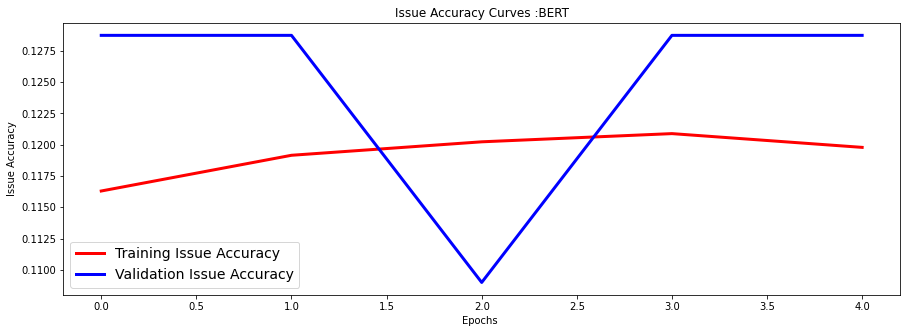

In [97]:
fig1 = plt.figure(figsize=(15,5))
plt.plot(BERT_model.history['issue_accuracy'],'r',linewidth=3.0)
plt.plot(BERT_model.history['val_issue_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Issue Accuracy', 'Validation Issue Accuracy'],fontsize=14)
plt.xlabel('Epochs ')
plt.ylabel('Issue Accuracy')
plt.title('Issue Accuracy Curves :BERT')
plt.show()

Here, we can see that the accuracy of the issue label is between 11% to 13% which is very low.

# Results:

In this project I have used Naive bayes, Logistic regression, SVM, CNN, LSTM and BERT with different text featurizations to train our model. For Logistic regression and SVM, I have used GridSearchCV to find the best hyperparameter. 

In neural network part, I have used CNN with word embedding and after that I choosed to run the CNN again without the weight matrix. Afterward I have tried recurrent neural network (RNN) with LSTM architecture and finaly I have chosen to do the classification with BERT. below I will explain the result of each experiment:

### Naive Bayes with TF-IDF :
First I used TF-IDF to vectorize the text data and then I tried the Naive bayes model. With the very short training time I got nearly 80% of accuracy for Naive Bayes model. with this model, most of the labels were predicted pretty well. Some of the labels did not predict well such as "payday loan", "Student loan", "Money transfer" and "Other financial service". The reason is there are less amount of data for these labels compare to other labels.

                         precision    recall  f1-score   support

        Debt collection       0.86      0.71      0.78      1142
          Consumer Loan       0.83      0.56      0.67       736
               Mortgage       0.86      0.76      0.81      1586
            Credit card       0.89      0.84      0.86      2505
       Credit reporting       0.81      0.90      0.86      3511
           Student loan       0.70      0.51      0.59       133
     account or service       0.96      0.91      0.94      2984
            Payday loan       0.00      0.00      0.00        22
        Money transfers       0.51      0.27      0.35       145
      financial service       0.70      0.86      0.77       172
           Prepaid card       0.93      0.80      0.86       426


### Logistic Regression with TF-IDF :
As we saw before, In the Logistic Regression model I used GridSearch to be able to tune the hyperparameters and try different values including (0.001, 0.01, 0.1, 1, 10 and 100) to find the model with the lowest error metric. The value of ‘C’  In logistic regressions, determines the amount of regularization, and the lower values will soar the regularization. After this process, I got 85% of accuracy for my logistic regression model. Moreover, I can again tune the hyperparameters and try different values from 1 to 9 to find a better value for 'C'. It might helps to increase the accuracy of the model. With this model, we got more accuracy for the labels which have not predicted with naive bayes model. The only label which had not predicted by the model is payday loan and this was because of the less amount of data for this label and Most of the texts of this label, predicted as "Debt collection". It shows that the texts of "payday loan" label is similar to this labels.

                         precision    recall  f1-score   support

        Debt collection       0.81      0.80      0.80      1142
          Consumer Loan       0.79      0.62      0.70       736
               Mortgage       0.82      0.82      0.82      1586
            Credit card       0.85      0.85      0.85      2505
       Credit reporting       0.83      0.89      0.86      3511
           Student loan       0.71      0.60      0.65       133
     account or service       0.93      0.95      0.94      2984
            Payday loan       0.00      0.00      0.00        22
        Money transfers       0.67      0.28      0.39       145
      financial service       0.83      0.77      0.80       172
           Prepaid card       0.92      0.79      0.85       426

### Support Vector Machine with TF-IDF :
For Support Vector Machine (SVM) model, again I used GridSearch for tuning the hyperparameters and try different values including (0.001, 0.01, 0.1, 1, 10 and 100) to run the model with the lowest error. After this process, I got 85.1% of accuracy for my SVM model which is approximately same as the accuracy which I got from logistic regression. The model got the higher accuracy for predicting the labels which have not predicted with naive bayes model. The accuracy for other labels was also a little bit higher than the logistic regression. Again, The only label which have not predicted by the model is payday loan due to the less amount of data for this label.

                         precision    recall  f1-score   support

        Debt collection       0.81      0.80      0.80      1142
          Consumer Loan       0.81      0.61      0.70       736
               Mortgage       0.81      0.81      0.81      1586
            Credit card       0.86      0.84      0.85      2505
       Credit reporting       0.82      0.90      0.86      3511
           Student loan       0.72      0.59      0.65       133
     account or service       0.92      0.96      0.94      2984
            Payday loan       0.00      0.00      0.00        22
        Money transfers       0.70      0.28      0.40       145
      financial service       0.84      0.73      0.78       172
           Prepaid card       0.91      0.83      0.87       426

### CNN with pre-trained embedding (GloVe) : 
In the Neural network part, first I have tried CNN with pre-trained word embedding (GloVe). GloVe is a log-bilinear model for distributed word representation. The main intuition underlying the model is the simple observation that ratios of word-word co-occurrence probabilities have the potential for encoding some form of meaning. I have used the 100 dimensional word embeding to create a weight matrix in order to use it in my CNN model. After fitting the model on the data, I got, after 10 epochs, an accuracy of 84.3% which I think is a good value for model accuracy. Moreover, after 2 epochs the CNN tends to be overfitting the training data and therefore we need to implement early stopping to prevent overfitting and tune the number of epochs during training. It is also shows that after 6 epochs we got the highest accuracy and after that, althogh the accuracy of the model had some fluctuations, it is obvious that the accuracy would not increase any more by increasing the epochs.

                         precision    recall  f1-score   support

        Debt collection       0.86      0.71      0.78      1142
          Consumer Loan       0.83      0.56      0.67       736
               Mortgage       0.86      0.76      0.81      1586
            Credit card       0.89      0.84      0.86      2505
       Credit reporting       0.81      0.90      0.86      3511
           Student loan       0.70      0.51      0.59       133
     account or service       0.96      0.91      0.94      2984
            Payday loan       0.00      0.00      0.00        22
        Money transfers       0.51      0.27      0.35       145
      financial service       0.70      0.86      0.77       172
           Prepaid card       0.93      0.80      0.86       426

### CNN without pre-traind embedding : 
After using CNN with weight matrix, Since the innovation of CNN is the ability to automatically learn a large number of weights in parallel specific to a training dataset under the constraints of a specific classification problem, I have tried CNN without weight matrix and I let the CNN to learn it's weights during training process instead of using a pre-trained word embeddings. In this part, after 10 epochs, I got the accuracy of 85.5% for my model. Therefore, Here the model have more accuracy if I do not use the pre-trained word embedding. The accuracy, at first, increased to 84.3% and after 3 epochs, Although the model going to be overfitting the training data after 3 epochs, the accuracy of the model increased to 85.5% after 10 epochs. It means that that the accuracy might increase if we increase the number of epochs.

It is evident that in both CNN models, After 2 or 3 epochs the CNN tends to be overfitting the training data. this architecture is subject to over-fitting, and therefore it is better to limit the number of eras.

                         precision    recall  f1-score   support

        Debt collection       0.83      0.75      0.79      1142
          Consumer Loan       0.78      0.69      0.73       736
               Mortgage       0.84      0.80      0.82      1586
            Credit card       0.87      0.88      0.87      2505
       Credit reporting       0.86      0.87      0.86      3511
           Student loan       0.67      0.51      0.58       133
     account or service       0.95      0.94      0.95      2984
            Payday loan       0.00      0.00      0.00        22
        Money transfers       0.65      0.28      0.39       145
      financial service       0.82      0.73      0.78       172
           Prepaid card       0.88      0.85      0.86       426

### LSTM (RNN) with pre-trained embedding : 
Long Short Term Memory networks (LSTM) is an artificial RNN architecture which is used in for deep learning. I used the bidirectional LSTM which run the inputs in 2 ways, past to future and future to past and because of that. In my model I used my embeddings, bidirectional LSTM, with dense layer. In this model, after 10 epochs, I got the accuracy of 85% for my model. From the plots, we can understand that after 2 epochs the LSTM started to overfit the training data. Thus we need to implement early stopping to prevent overfitting and tune the number of epochs during training. It is also shows that after 2 epochs the loss of validation data started to increase. So, here we should not increase the number of epochs. The accuracy of this model also reached to 86% after 6 epochs. Furthermore, Althogh I got the 85% of accuracy, by looking at the classification report it is obvious that the model could not predict the labels well and 5 labels got thef1-score of under 50%. 

                         precision    recall  f1-score   support

        Debt collection       0.24      0.96      0.38      1142
          Consumer Loan       0.17      0.93      0.28       736
               Mortgage       0.40      0.96      0.56      1586
            Credit card       0.52      0.97      0.68      2505
       Credit reporting       0.39      0.99      0.56      3511
           Student loan       0.21      0.86      0.34       133
     account or service       0.72      0.99      0.84      2984
            Payday loan       0.02      0.36      0.05        22
        Money transfers       0.13      0.86      0.23       145
      financial service       0.27      0.99      0.42       172
           Prepaid card       0.56      0.92      0.70       426

### Classification with BERT : 
I have used the Bert model and tokenizer form the transformers library to transform my texts into BERT tokens, pad and shorten them to my maximum length. I also loaded the BERT model which is the 12-layer bert-base-uncased. This model is a pre-trained model on English language using a masked language modeling (MLM) objective. I have tried Huggingface Transformers because Transformers makes it easy to switch between modelssuch as BERT, ALBERT, XLnet and so forth. it means that I can easily swith the algorithm by changing the model in my code. 

In this part, same as before, my input will bethe ‘Consumer complaint narrative’, but my outputs will be two columns including ‘Product’ and ‘Issue’. After fitting and evaluating the model, I got the accuracy of 12.5% and 26% for issue and product labels, respectively. Compare to other algorithms which have done before, The accuracy of this model is very low.

There are, several ways for increasing the performance of this model. The one that I have tried was the simple one for a better performance I can do different things such as tuning the hyperparameters or change the optimizer.
      

# Accuracy Plot 

Now I will show you all the accuracies which I got from the different models.

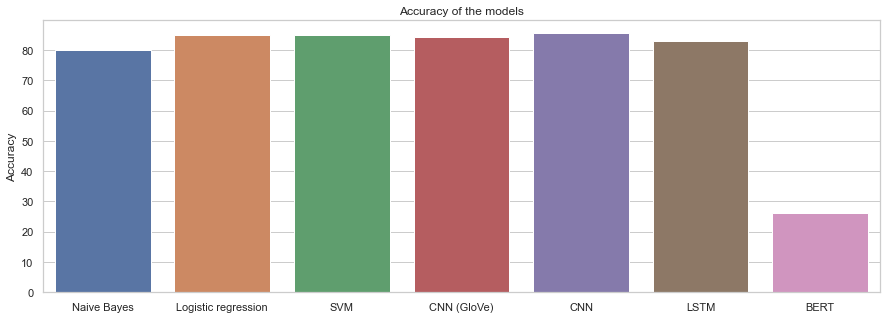

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15,5))
# Creating the list of accuracies which I got before:
accuracy = [79.86,85.07,85.13,84.38,85.5,83,26.02]
# Name of the different classifiers
names = ['Naive Bayes','Logistic regression','SVM','CNN (GloVe)','CNN','LSTM','BERT']
ax = sns.barplot(x=names, y=accuracy)
plt.ylabel('Accuracy')
plt.title('Accuracy of the models')
plt.show()

# Discuss best Results


From all the experiments that I have done on my dataset, I can see that Support vector machine with TF-IDF and the convolutional neural network without weight matrix, has the highest accuracy of 85.13% and 85.5% respectively.

We can also improve the performance of these classifiers in different ways:

##### Support Vector Machine (SVM):
I used GridSearch to tune the hyperparameters and try different values including (0.001, 0.01, 0.1, 1, 10 and 100) to find the model with the lowest error metric. The value of ‘C’ In logistic regressions, determines the amount of regularization, and the lower values will soar the regularization. After this process, I got 0.1 as the best parameter for my SVM model. Therefore I have set the "C" to 0.1. In order to have better performance, I can try the gridsearchcv again with the parameters between 0.1 to 1, for instance I can make a list of parameters including (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9).

##### CNN without weight matrix: 
Here, I have let the CNN to learn it's weights during training process instead of using a pre-trained word embeddings. In this part, after 10 epochs, I got the accuracy of 85.5% for my model.

The accuracy, at first, increased to 84.3% and after 3 epochs the model started to overfit the training data. On the other hand, the accuracy of the model increased to 85.5% after 10 epochs. It means that it might be helpful if I increase the number of epochs. Therefore, by enhancing the number of epochs, the accuracy of the model might increase.






# Evaluate the overall attempt and outcome

Overall, by looking at the classification reports and confusion matrix of the two classifiers which had the best results (SVM and CNN), we can easily understand that these classifiers predicted most of the labels correctly. The only label which had not predicted by these classifiers was payday loan due to the less amount of data for this label. Moreover, Most of the texts which belong to this label, predicted as "Debt collection". It shows that the texts of "payday loan" label is similar to this labels. Thus we can say that the classification problem is nearly solved.

                          SVM (f1-score)     CNN (f1-score)
  
        Debt collection          0.80             0.79
          Consumer Loan          0.70             0.73
               Mortgage          0.81             0.82
            Credit card          0.85             0.87
       Credit reporting          0.86             0.86
           Student loan          0.65             0.58
     account or service          0.94             0.95
            Payday loan          0.00             0.00
        Money transfers          0.40             0.39
      financial service          0.78             0.78
           Prepaid card          0.87             0.86
                    
